<a href="https://colab.research.google.com/github/Virtud87/MIT-capstone-project/blob/main/Capstone_Project_Reference_Notebook_Full_Code_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [806]:
pip install scikit-learn-extra

In [807]:
from time import time

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import offsetbox

from sklearn import manifold, datasets, decomposition

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering, DBSCAN

from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

from scipy.spatial.distance import pdist

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [808]:
# Import the dataset and create a data frame
customers_df = pd.read_csv('/content/marketing_campaign.csv')

# Check first five rows
customers_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [809]:
# Check last five rows
customers_df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

In [810]:
# Check columns
customers_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [811]:
# Rename column names to more meaningful, descriptive names
customers_df = customers_df.rename(columns={'Year_Birth': 'birthYear', 'Education': 'maxEducation', 'Marital_Status': 'maritalStatus',
                                            'Income': 'yearlyIncome', 'Kidhome': 'no.Children', 'Teenhome': 'no.Teens', 'Dt_Customer': 'enrollmentDate',
                                            'Recency': 'no.DaysLastPurchase', 'MntWines': 'amountSpentWine', 'MntFruits': 'amountSpentFruit',
                                            'MntMeatProducts': 'amountSpentMeat', 'MntFishProducts': 'amountSpentFish', 'MntSweetProducts': 'amountSpentSweets',
                                            'MntGoldProds': 'amountSpentGold', 'NumDealsPurchases': 'no.DiscountPurchases', 'NumWebPurchases': 'no.OnlinePurchases',
                                            'NumCatalogPurchases': 'no.CatalogPurchases', 'NumStorePurchases': 'no.StorePurchases', 'NumWebVisitsMonth': 'no.WebVisitsMonthly',
                                            'AcceptedCmp3': 'accepted3rdOffer', 'AcceptedCmp4': 'accepted4thOffer', 'AcceptedCmp5': 'accepted5thOffer',
                                            'AcceptedCmp1': 'accepted1stOffer', 'AcceptedCmp2': 'accepted2ndOffer', 'Complain': 'complained', 'Response': 'acceptedLatestOffer'})

# Verify column names changed
customers_df.columns

Index(['ID', 'birthYear', 'maxEducation', 'maritalStatus', 'yearlyIncome',
       'no.Children', 'no.Teens', 'enrollmentDate', 'no.DaysLastPurchase',
       'amountSpentWine', 'amountSpentFruit', 'amountSpentMeat',
       'amountSpentFish', 'amountSpentSweets', 'amountSpentGold',
       'no.DiscountPurchases', 'no.OnlinePurchases', 'no.CatalogPurchases',
       'no.StorePurchases', 'no.WebVisitsMonthly', 'accepted3rdOffer',
       'accepted4thOffer', 'accepted5thOffer', 'accepted1stOffer',
       'accepted2ndOffer', 'complained', 'acceptedLatestOffer'],
      dtype='object')

In [812]:
# Check number of rows and columns
customers_df.shape

(2240, 27)

- Dataset has **2,240 rows** and **27 columns**

In [813]:
# Check for duplicates
customers_df.duplicated().sum()

0

In [814]:
# Check column data types and null values
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2240 non-null   int64  
 1   birthYear             2240 non-null   int64  
 2   maxEducation          2240 non-null   object 
 3   maritalStatus         2240 non-null   object 
 4   yearlyIncome          2216 non-null   float64
 5   no.Children           2240 non-null   int64  
 6   no.Teens              2240 non-null   int64  
 7   enrollmentDate        2240 non-null   object 
 8   no.DaysLastPurchase   2240 non-null   int64  
 9   amountSpentWine       2240 non-null   int64  
 10  amountSpentFruit      2240 non-null   int64  
 11  amountSpentMeat       2240 non-null   int64  
 12  amountSpentFish       2240 non-null   int64  
 13  amountSpentSweets     2240 non-null   int64  
 14  amountSpentGold       2240 non-null   int64  
 15  no.DiscountPurchases 

- **maxEducation, maritalStatus, enrollmentDate** are strings while every remaining column is numeric

- **yearlyIncome** is **missing 24 values** and is the only column with missing values

In [815]:
# Changing 'enrollmentDate' column from type 'object' to type 'dateTime'
customers_df.enrollmentDate = pd.to_datetime(customers_df.enrollmentDate, format='%d-%m-%Y').dt.date

#### **Observations and Insights from the Data overview:**

- Dataset has **2,240 rows** and **27 columns**

- **maxEducation, maritalStatus, enrollmentDate** are strings while every remaining column is numeric

- **yearlyIncome** is **missing 24 values** and is the only column with missing values

## **Exploratory Data Analysis (EDA)**


In [816]:
# Summary statistics
customers_df.describe().T

count          mean           std     min       25%  \
ID                    2240.0   5592.159821   3246.662198     0.0   2828.25   
birthYear             2240.0   1968.805804     11.984069  1893.0   1959.00   
yearlyIncome          2216.0  52247.251354  25173.076661  1730.0  35303.00   
no.Children           2240.0      0.444196      0.538398     0.0      0.00   
no.Teens              2240.0      0.506250      0.544538     0.0      0.00   
no.DaysLastPurchase   2240.0     49.109375     28.962453     0.0     24.00   
amountSpentWine       2240.0    303.935714    336.597393     0.0     23.75   
amountSpentFruit      2240.0     26.302232     39.773434     0.0      1.00   
amountSpentMeat       2240.0    166.950000    225.715373     0.0     16.00   
amountSpentFish       2240.0     37.525446     54.628979     0.0      3.00   
amountSpentSweets     2240.0     27.062946     41.280498     0.0      1.00   
amountSpentGold       2240.0     44.021875     52.167439     0.0      9.00   
no.DiscountPurchases  2240.0      2.325000      1.932238     0.0      1.00   
no.OnlinePurchases    2240.0      4.084821      2.778714     0.0      2.00   
no.CatalogPurchases   2240.0      2.662054      2.923101     0.0      0.00   
no.StorePurchases     2240.0      5.790179      3.250958     0.0      3.00   
no.WebVisitsMonthly   2240.0      5.316518      2.426645     0.0      3.00   
accepted3rdOffer      2240.0      0.072768      0.259813     0.0      0.00   
accepted4thOffer      2240.0      0.074554      0.262728     0.0      0.00   
accepted5thOffer      2240.0      0.072768      0.259813     0.0      0.00   
accepted1stOffer      2240.0      0.064286      0.245316     0.0      0.00   
accepted2ndOffer      2240.0      0.012946      0.113069     0.0      0.00   
complained            2240.0      0.009375      0.096391     0.0      0.00   
acceptedLatestOffer   2240.0      0.149107      0.356274     0.0      0.00   

                          50%       75%       max  
ID                     5458.5   8427.75   11191.0  
birthYear              1970.0   1977.00    1996.0  
yearlyIncome          51381.5  68522.00  666666.0  
no.Children               0.0      1.00       2.0  
no.Teens                  0.0      1.00       2.0  
no.DaysLastPurchase      49.0     74.00      99.0  
amountSpentWine         173.5    504.25    1493.0  
amountSpentFruit          8.0     33.00     199.0  
amountSpentMeat          67.0    232.00    1725.0  
amountSpentFish          12.0     50.00     259.0  
amountSpentSweets         8.0     33.00     263.0  
amountSpentGold          24.0     56.00     362.0  
no.DiscountPurchases      2.0      3.00      15.0  
no.OnlinePurchases        4.0      6.00      27.0  
no.CatalogPurchases       2.0      4.00      28.0  
no.StorePurchases         5.0      8.00      13.0  
no.WebVisitsMonthly       6.0      7.00      20.0  
accepted3rdOffer          0.0      0.00       1.0  
accepted4thOffer          0.0      0.00       1.0  
accepted5thOffer          0.0      0.00       1.0  
accepted1stOffer          0.0      0.00       1.0  
accepted2ndOffer          0.0      0.00       1.0  
complained                0.0      0.00       1.0  
acceptedLatestOffer       0.0      0.00       1.0

- The realistic oldest birth year is 1940 and the youngest is 1996.

- The max yearly income is $666,666.

- The minimum yearly income is just $1,730.

- The standard deviation for yearly income is quite large at ~$25,000.

- The most was spent on **meat** products, follow closely by **wine**.

- The least was spent on **fruit**.

- The number of **online** and **catalog** purchases are almost the same -- 27 and 28, respectively.

- The max number of **discounted** purchases for any customer is 15, which is high, as 75% of customers have 3 or less discounted purchases.

In [817]:
# Check number of unique values for each column
customers_df.nunique()

ID                      2240
birthYear                 59
maxEducation               5
maritalStatus              8
yearlyIncome            1974
no.Children                3
no.Teens                   3
enrollmentDate           663
no.DaysLastPurchase      100
amountSpentWine          776
amountSpentFruit         158
amountSpentMeat          558
amountSpentFish          182
amountSpentSweets        177
amountSpentGold          213
no.DiscountPurchases      15
no.OnlinePurchases        15
no.CatalogPurchases       14
no.StorePurchases         14
no.WebVisitsMonthly       16
accepted3rdOffer           2
accepted4thOffer           2
accepted5thOffer           2
accepted1stOffer           2
accepted2ndOffer           2
complained                 2
acceptedLatestOffer        2
dtype: int64

In [818]:
# Check the unique education levels
customers_df['maxEducation'].value_counts()

maxEducation
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [819]:
# Rename Graduation to College
customers_df.loc[customers_df['maxEducation'] == 'Graduation', 'maxEducation'] = 'College'

# Rename Master to Masters
customers_df.loc[customers_df['maxEducation'] == 'Master', 'maxEducation'] = 'Masters'

# Rename 2n Cycle to High School
customers_df.loc[customers_df['maxEducation'] == '2n Cycle', 'maxEducation'] = 'High School'

# Rename Basic to Middle School
customers_df.loc[customers_df['maxEducation'] == 'Basic', 'maxEducation'] = 'Middle School'

In [820]:
# Check the unique birth years
customers_df['birthYear'].value_counts()

birthYear
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

- Most customers were born in the 1970s

- There are birth years that are way to old and so must be an error in the data collection. There are no living customers in 2016 that were born in 1893, 1899, and 1900.

In [821]:
# Drop the three records for the aformentioned years
customers_df = customers_df[customers_df['birthYear'] > 1939]

In [822]:
# Check the unique values for marital status
customers_df['maritalStatus'].value_counts()

maritalStatus
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

- Most customers are married.

- 'Absurd', 'YOLO', and 'Alone' sound closest to 'Single' and will be combined into 'Single'.

- Curious if 'Widow' has just females, as the name implies, or if they also added men(widowers) under 'Widow' despite the naming difference.

- Assuming 'Together' means a non-married relationship.

In [823]:
# Set values 'Alone', 'Absurd', 'YOLO' to 'Single' value
customers_df.loc[(customers_df['maritalStatus'] == 'Alone') | (customers_df['maritalStatus'] == 'Absurd') | (customers_df['maritalStatus'] == 'YOLO'), 'maritalStatus'] = 'Single'

## **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


### **Numerical**

In [824]:
# Function to create 2 subplots: boxplot and histogram
def boxplot_histogram(dataframe, feature, figsize = (10, 8)):

  univari_fig, (box, histo) = plt.subplots(nrows=2, sharex=True, figsize = figsize) # create subplots

  sns.boxplot(data = dataframe, x = feature, ax = box) # create boxplot

  sns.histplot(data = dataframe, x = feature, ax = histo) # create histogram

In [825]:
# Function to create a histogram
def histogram(dataframe, feature, figsize = (10, 8)):

  sns.histplot(data = dataframe, x = feature)

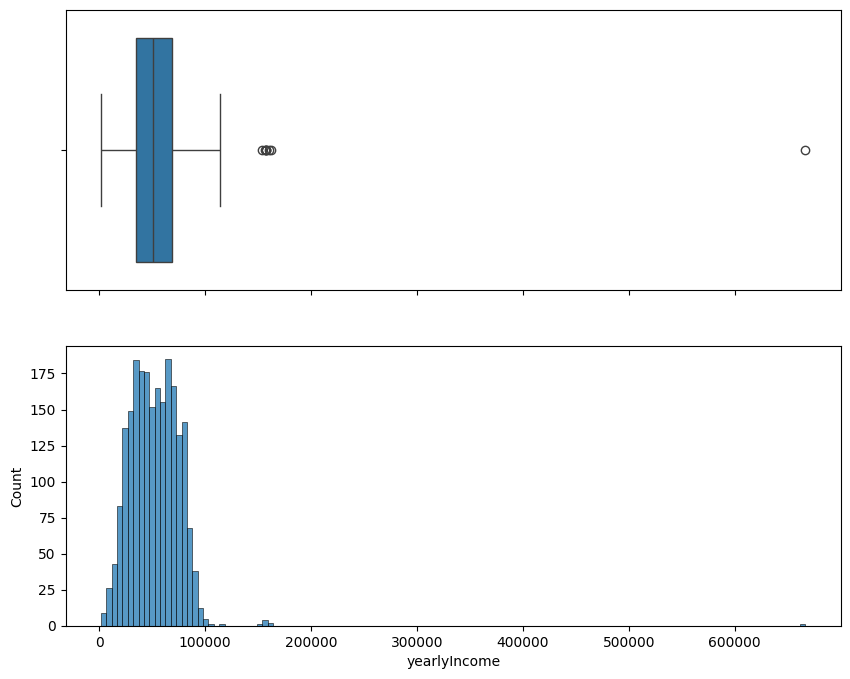

In [826]:
# Check distribution of yearly incomes
boxplot_histogram(customers_df, 'yearlyIncome')

- The yearly incomes for customers are skewed to the right with at least 1 extreme outlier, otherwise, most incomes are less than $100,000.

- Will further analyze the record(s) that have the extreme outlier for income.

In [827]:
# Calculating the upper whisker for the Income variable

customers_df['yearlyIncome'] = pd.to_numeric(customers_df['yearlyIncome'], errors='coerce')

Q1 = customers_df['yearlyIncome'].quantile(q=0.25)                          # Finding the first quartile

Q3 = customers_df['yearlyIncome'].quantile(q=0.75)                          # Finding the third quartile

IQR = Q3 - Q1                                       # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118348.5


In [828]:
# Let's check the observations with extreme value for the Income variable
customers_df[customers_df.yearlyIncome > upper_whisker]

ID  birthYear maxEducation maritalStatus  yearlyIncome  no.Children  \
164    8475       1973          PhD       Married      157243.0            0   
617    1503       1976          PhD      Together      162397.0            1   
655    5555       1975      College      Divorced      153924.0            0   
687    1501       1982          PhD       Married      160803.0            0   
1300   5336       1971      Masters      Together      157733.0            1   
1653   4931       1977      College      Together      157146.0            0   
2132  11181       1949          PhD       Married      156924.0            0   
2233   9432       1977      College      Together      666666.0            1   

      no.Teens enrollmentDate  no.DaysLastPurchase  amountSpentWine  ...  \
164          1     2014-03-01                   98               20  ...   
617          1     2013-06-03                   31               85  ...   
655          0     2014-02-07                   81                1  ...   
687          0     2012-08-04                   21               55  ...   
1300         0     2013-06-04                   37               39  ...   
1653         0     2013-04-29                   13                1  ...   
2132         0     2013-08-29                   85                2  ...   
2233         0     2013-06-02                   23                9  ...   

      no.CatalogPurchases  no.StorePurchases  no.WebVisitsMonthly  \
164                    22                  0                    0   
617                     0                  1                    1   
655                     0                  0                    0   
687                    28                  1                    0   
1300                    0                  1                    1   
1653                   28                  0                    1   
2132                    0                  0                    0   
2233                    1                  3                    6   

      accepted3rdOffer  accepted4thOffer  accepted5thOffer  accepted1stOffer  \
164                  0                 0                 0                 0   
617                  0                 0                 0                 0   
655                  0                 0                 0                 0   
687                  0                 0                 0                 0   
1300                 0                 0                 0                 0   
1653                 0                 0                 0                 0   
2132                 0                 0                 0                 0   
2233                 0                 0                 0                 0   

      accepted2ndOffer  complained  acceptedLatestOffer  
164                  0           0                    0  
617                  0           0                    0  
655                  0           0                    0  
687                  0           0                    0  
1300                 0           0                    0  
1653                 0           0                    0  
2132                 0           0                    0  
2233                 0           0                    0  

[8 rows x 27 columns]

In [829]:
# Check the 99.5% percentile value for the Income variable
quantile_value = customers_df['yearlyIncome'].quantile(q=0.995)

In [830]:
quantile_value

102148.6

In [831]:
# Get rows that have the outlier income level
customers_df[customers_df['yearlyIncome'] > 102148.6]

ID  birthYear maxEducation maritalStatus  yearlyIncome  no.Children  \
164    8475       1973          PhD       Married      157243.0            0   
203    2798       1977          PhD      Together      102160.0            0   
252   10089       1974      College      Divorced      102692.0            0   
617    1503       1976          PhD      Together      162397.0            1   
646    4611       1970      College      Together      105471.0            0   
655    5555       1975      College      Divorced      153924.0            0   
687    1501       1982          PhD       Married      160803.0            0   
1300   5336       1971      Masters      Together      157733.0            1   
1653   4931       1977      College      Together      157146.0            0   
1898   4619       1945          PhD        Single      113734.0            0   
2132  11181       1949          PhD       Married      156924.0            0   
2233   9432       1977      College      Together      666666.0            1   

      no.Teens enrollmentDate  no.DaysLastPurchase  amountSpentWine  ...  \
164          1     2014-03-01                   98               20  ...   
203          0     2012-11-02                   54              763  ...   
252          0     2013-04-05                    5              168  ...   
617          1     2013-06-03                   31               85  ...   
646          0     2013-01-21                   36             1009  ...   
655          0     2014-02-07                   81                1  ...   
687          0     2012-08-04                   21               55  ...   
1300         0     2013-06-04                   37               39  ...   
1653         0     2013-04-29                   13                1  ...   
1898         0     2014-05-28                    9                6  ...   
2132         0     2013-08-29                   85                2  ...   
2233         0     2013-06-02                   23                9  ...   

      no.CatalogPurchases  no.StorePurchases  no.WebVisitsMonthly  \
164                    22                  0                    0   
203                     9                 10                    4   
252                     9                 13                    2   
617                     0                  1                    1   
646                     8                 13                    3   
655                     0                  0                    0   
687                    28                  1                    0   
1300                    0                  1                    1   
1653                   28                  0                    1   
1898                    0                  0                    1   
2132                    0                  0                    0   
2233                    1                  3                    6   

      accepted3rdOffer  accepted4thOffer  accepted5thOffer  accepted1stOffer  \
164                  0                 0                 0                 0   
203                  0                 1                 1                 1   
252                  0                 1                 1                 1   
617                  0                 0                 0                 0   
646                  0                 0                 1                 1   
655                  0                 0                 0                 0   
687                  0                 0                 0                 0   
1300                 0                 0                 0                 0   
1653                 0                 0                 0                 0   
1898                 0                 0                 0                 0   
2132                 0                 0                 0                 0   
2233                 0                 0                 0                 0   

      accepted2ndOffer  complained  acce

- Dropping the 8 outlier records that are skewing the data to the right

In [832]:
# Drop the outlier income level
customers_df.drop(customers_df.query('yearlyIncome > 153000').index, inplace=True)

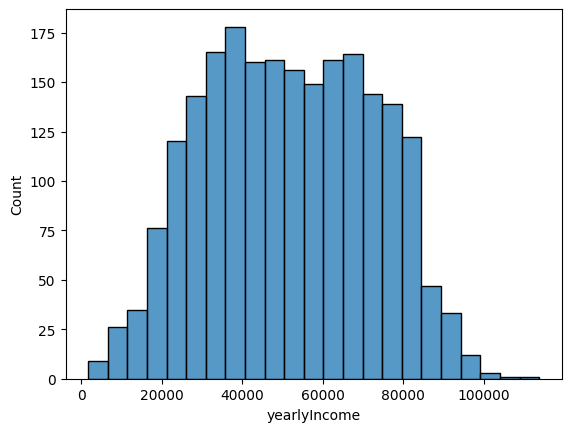

In [833]:
histogram(customers_df, 'yearlyIncome')

- Yearly Income now has bimodal and roughly normal distribution.

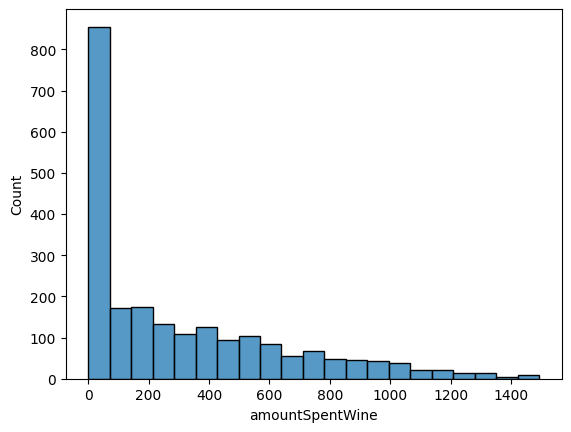

In [834]:
histogram(customers_df, 'amountSpentWine')

- The distribution of the amount spent on wine is skewed to the right with most customers spending under a hundred dollars on wine.

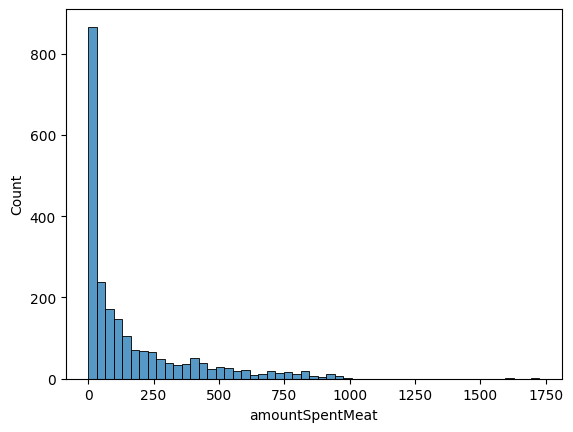

In [835]:
histogram(customers_df, 'amountSpentMeat')

- The distribution for the amount spent on meat is also skewed to the right with most customers spending under $50 in meat.

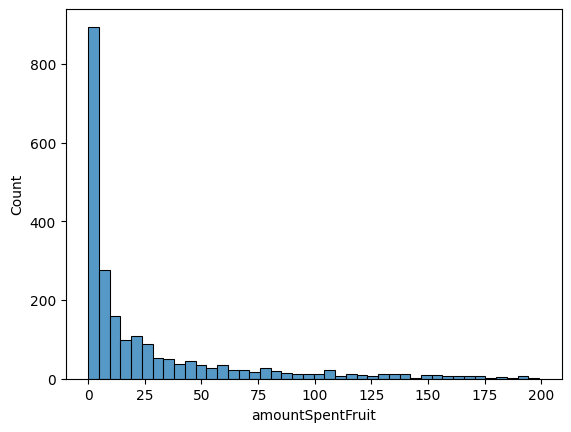

In [836]:
histogram(customers_df, 'amountSpentFruit')

- The distribution for the amount spent on wine is also skewed to the right with most customers spending under $10 on fruit.

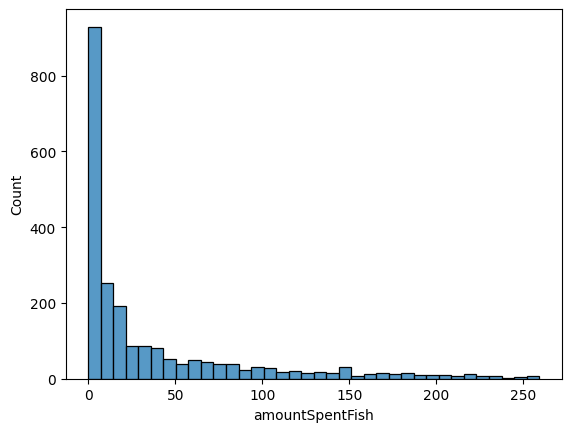

In [837]:
histogram(customers_df, 'amountSpentFish')

- The distribution of the amount spent on fish is also skewed to the right with most customers spending less than $20 on fish.

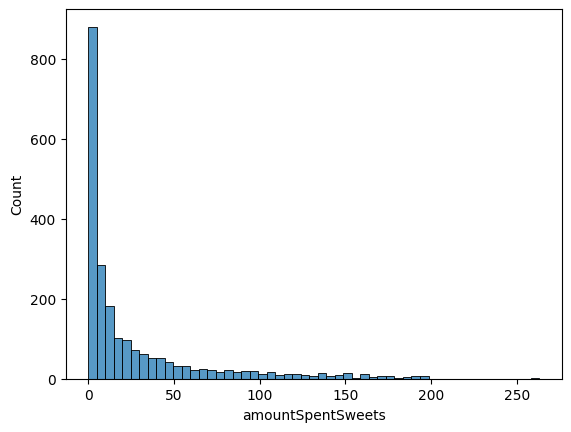

In [838]:
histogram(customers_df, 'amountSpentSweets')

- The distribution for the amount spent on sweets is also skewed to the right with most customers spending under $10.

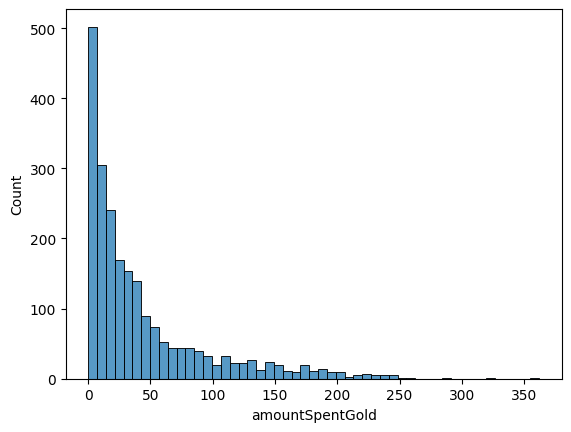

In [839]:
histogram(customers_df, 'amountSpentGold')

- The distribution for the amount spent on gold follows the pattern of being skewed to the right with most customers spending under $10.

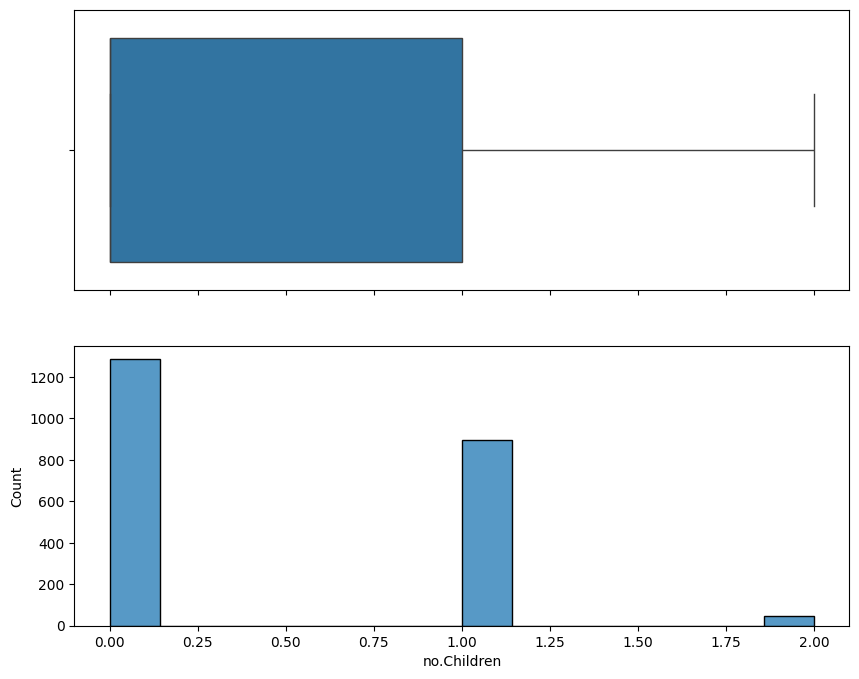

In [840]:
# Check the distribution for number of children
boxplot_histogram(customers_df, 'no.Children')

- Most(>1,200) customers have no children in their household.

- ~900 customers have 1 child.

- Less than 50 customers have 2 children.

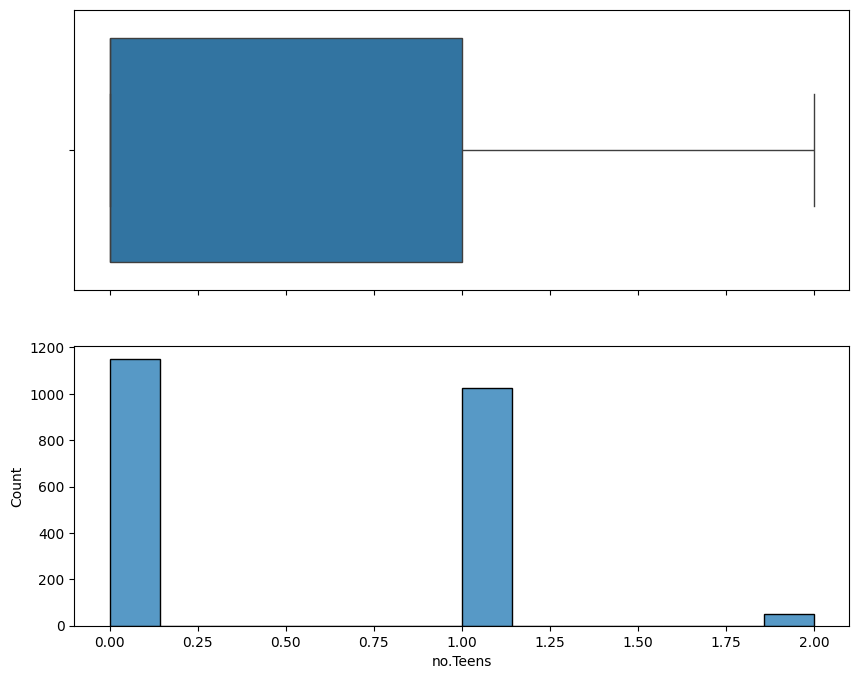

In [841]:
# Check the distribution for number of teens
boxplot_histogram(customers_df, 'no.Teens')

- Most customers have no teens in their household.

- ~1,000 customers have 1 teen.

- ~50 customers have 2 teens.

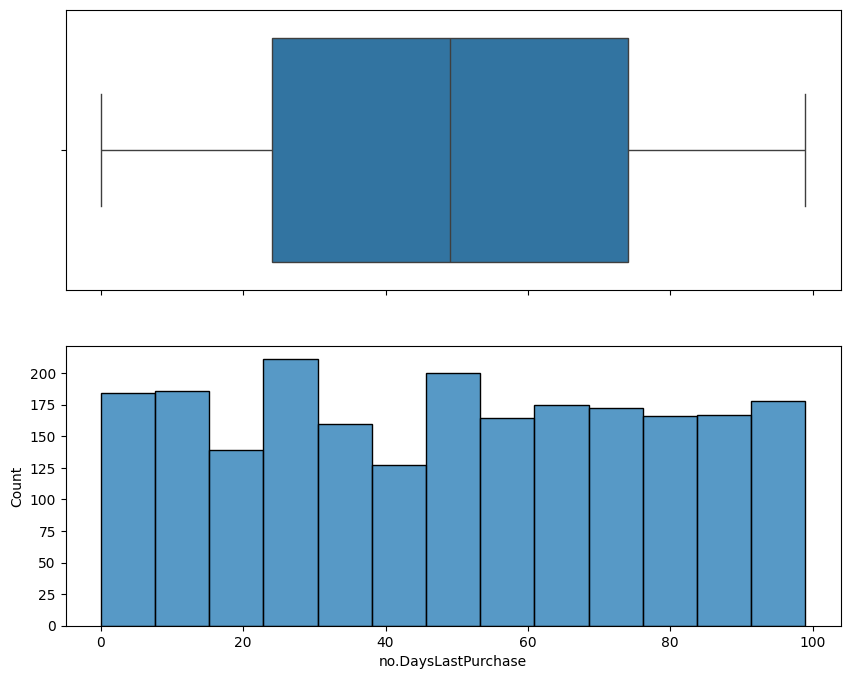

In [842]:
boxplot_histogram(customers_df, 'no.DaysLastPurchase')

- The distribution of customers is bimodal at days ~25 and ~50 or roughly 4 weeks and 7 weeks, respectively.

- Around days 20 and 40 there are considerable drops.

- The number of customers that have gone about a week without making the purchase is almost even to those that went about two weeks without making a purchase.

- At greater than 50 days without a purchase, the amount of customers stays relatively constant at ~175.

In [843]:
# Function to calculate percent of customers that accepted a certain offer
def percent_accepted_by_offer(offer):

  if '1' in offer:
    offer_name = 'first'
  elif '2' in offer:
    offer_name = 'second'
  elif '3' in offer:
    offer_name = 'third'
  else:
    offer_name = 'fourth'

  rejected = sum(customers_df[offer] == 0)

  accepted = sum(customers_df[offer] == 1)

  total = rejected + accepted

  percent_accepted = round(accepted / total * 100)

  print(f'{percent_accepted}% of customers accepted the {offer_name} offer.')

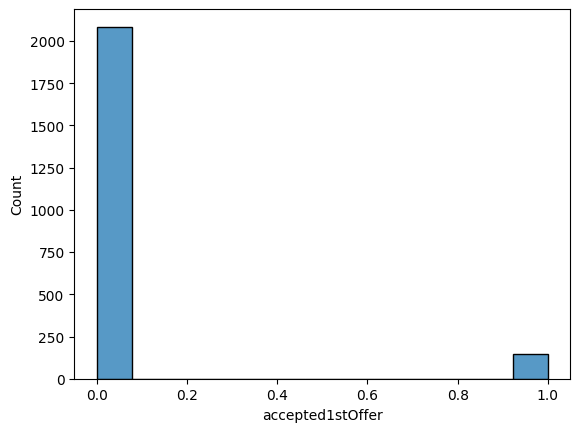

In [844]:
# Check distribution of those that accepted 1st offer and those that did not
histogram(customers_df, 'accepted1stOffer')

In [845]:
percent_accepted_by_offer('accepted1stOffer')

6% of customers accepted the first offer.


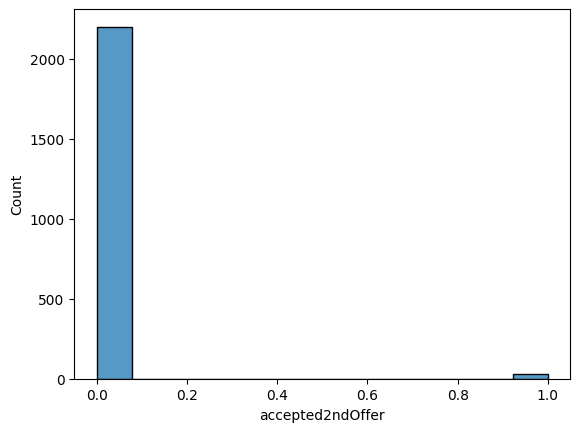

In [846]:
# Check distribution of those that accepted 2nd offer and those that did not
histogram(customers_df, 'accepted2ndOffer')

In [847]:
percent_accepted_by_offer('accepted2ndOffer')

1% of customers accepted the second offer.


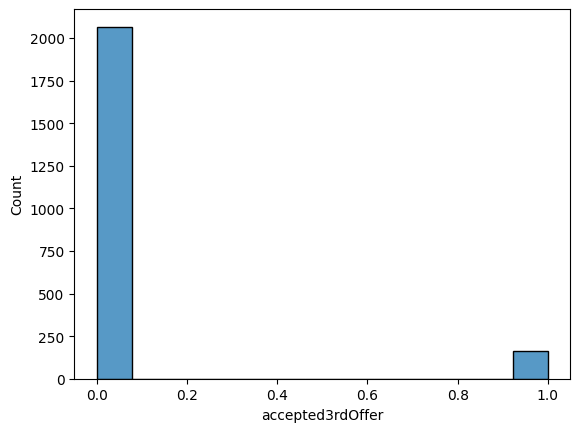

In [848]:
# Check distribution of those that accepted 3rd offer and those that did not
histogram(customers_df, 'accepted3rdOffer')

In [849]:
percent_accepted_by_offer('accepted3rdOffer')

7% of customers accepted the third offer.


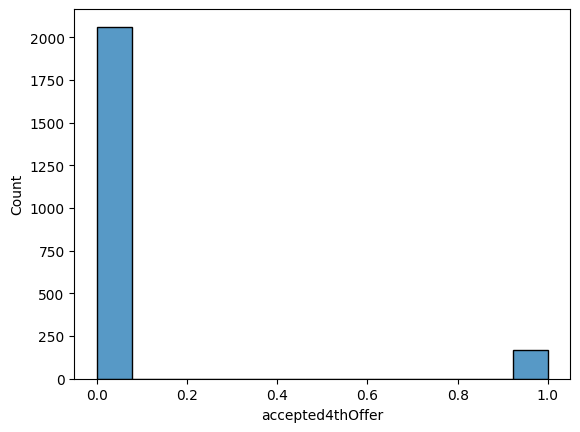

In [850]:
# Check distribution of those that accepted 4th offer and those that did not
histogram(customers_df, 'accepted4thOffer')

In [851]:
percent_accepted_by_offer('accepted4thOffer')

7% of customers accepted the fourth offer.


### **Categorical**

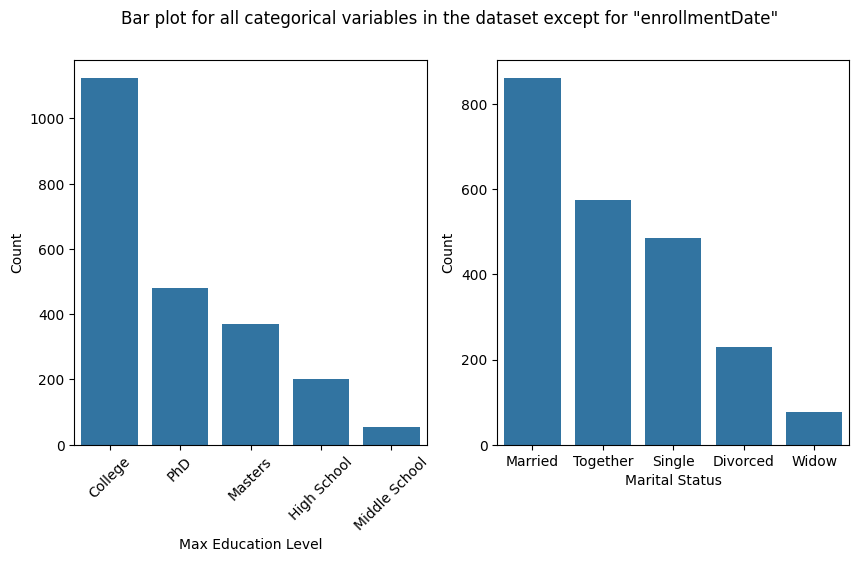

In [852]:
# Bar charts for categorical variable distribution
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle('Bar plot for all categorical variables in the dataset except for "enrollmentDate"')

sns.countplot(ax=axes[0], x='maxEducation', data=customers_df, order=customers_df['maxEducation'].value_counts().index)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel('Max Education Level')
axes[0].set_ylabel('Count')

sns.countplot(ax = axes[1], x = 'maritalStatus', data = customers_df, order=customers_df['maritalStatus'].value_counts().index)
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count');

- The majority of customers are **college graduates** and **married**.

- Very few customers have the **lowest level of education**.

- Few customers are **widows**.

## **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

### **Numeric Numeric Analysis**

In [853]:
# Get numerical columns only
numerical_df = customers_df.drop(['maxEducation', 'maritalStatus', 'enrollmentDate'], axis=1)

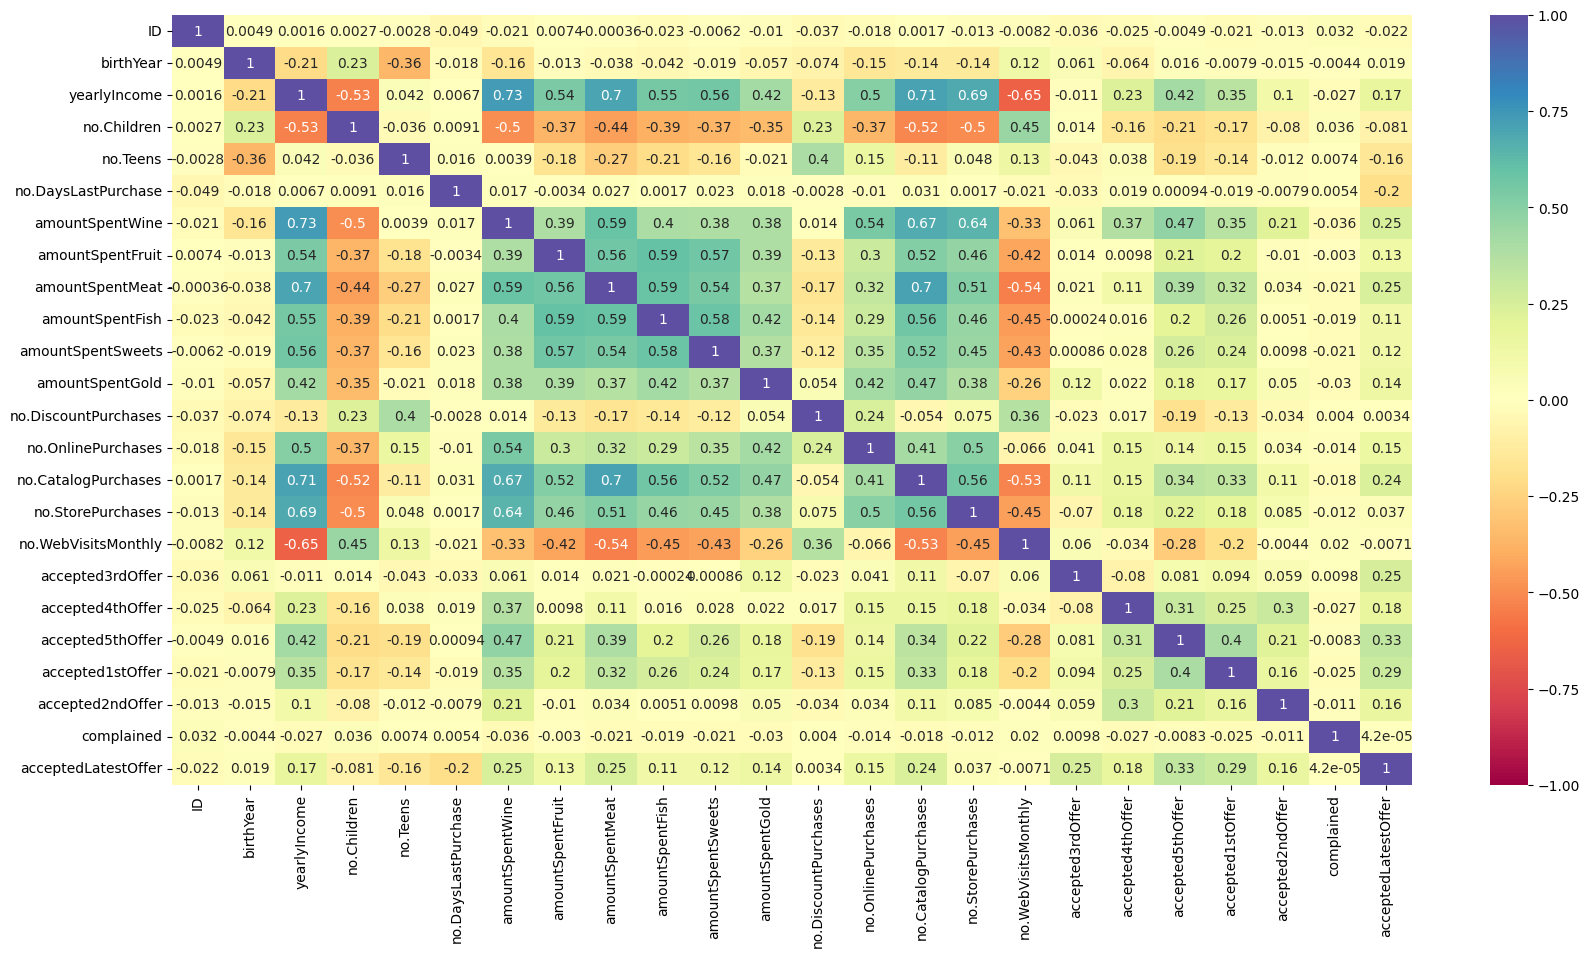

In [854]:
# check for correlation between numeric variables
plt.figure(figsize=(20, 10))

sns.heatmap(numerical_df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

plt.show();

- There is **moderate positive** correlation between a customer's yearly income and the amount they spent on wine and meat products.

- There is also a **moderate positive** correlation between a customer's yearly income and the number of puchases from a catalog and from a store.

- There is **moderate negative** correlation between a customer's yearly income and the number of monthly website visits.

- There is **moderate negative** correlation between the number of children a customer has and the amount they spend on wine and the number of catalog and store purchases they make. It makes sense that the more children a customer has, the slightly less they would spend on wine.

- There is a **moderate positive** correlation between the amount spent on wine and the amount spent on meat.

- There is **moderate positive** correlation between the amount spent on wine and the number of online purchases and slightly higher correlation between the amount spent on wine and the number of catalog and store purchases.

- Those with a PhD have the highest income and those with just a middle school education make the least. No surprise for either one.

- Interestingly, those that are single, together, and married have almost the same amount of income, ~ $50,000.

- Also interestingly, but not surprising, those customers who are divorced or widowed have the higher income.

- Those customers with no children have a much higher income, which is not surprising.

- Interestingly, those customers with two teens have the higher income.

- Across all marital statuses, those with no children are most numerous.

- Those with 2 children number the lowest with widows having no small children.

- Most divorced customers have 1 teen and very few have 2 teens.

- Most married, single, and couples have no teens.

- Most widows have 1 teen and almost none have 2 teens.

### **Categoric Numeric Analysis**

In [855]:
# Function for analyzing categoric and numeric variables
def boxplot_barplot(dataframe, x, y):
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  fig.suptitle(f'Boxplot and Barplot for {x} and {y}')

  sns.boxplot(dataframe, x=x, y=y, order=dataframe[x].value_counts().index, ax=axes[0])
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)

  sns.barplot(dataframe, x=x, y=y, order=dataframe[x].value_counts().index, ax=axes[1])
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=80)

  plt.show()

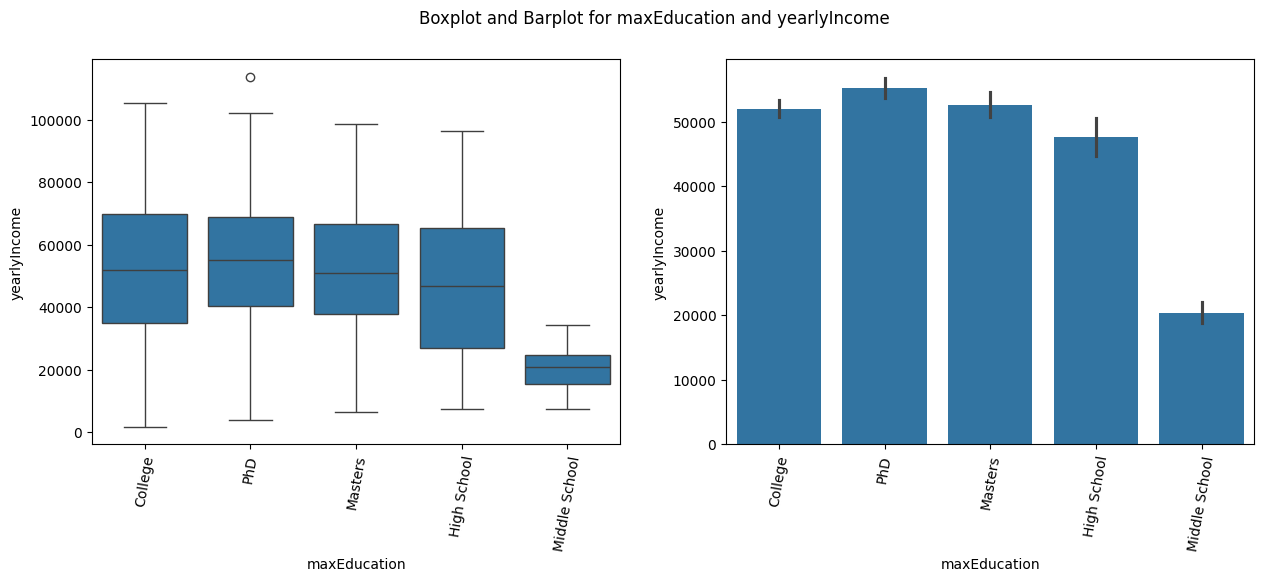

In [856]:
boxplot_barplot(customers_df, 'maxEducation', 'yearlyIncome')

- Unsurprisingly, those with higher education tend to earn more money.

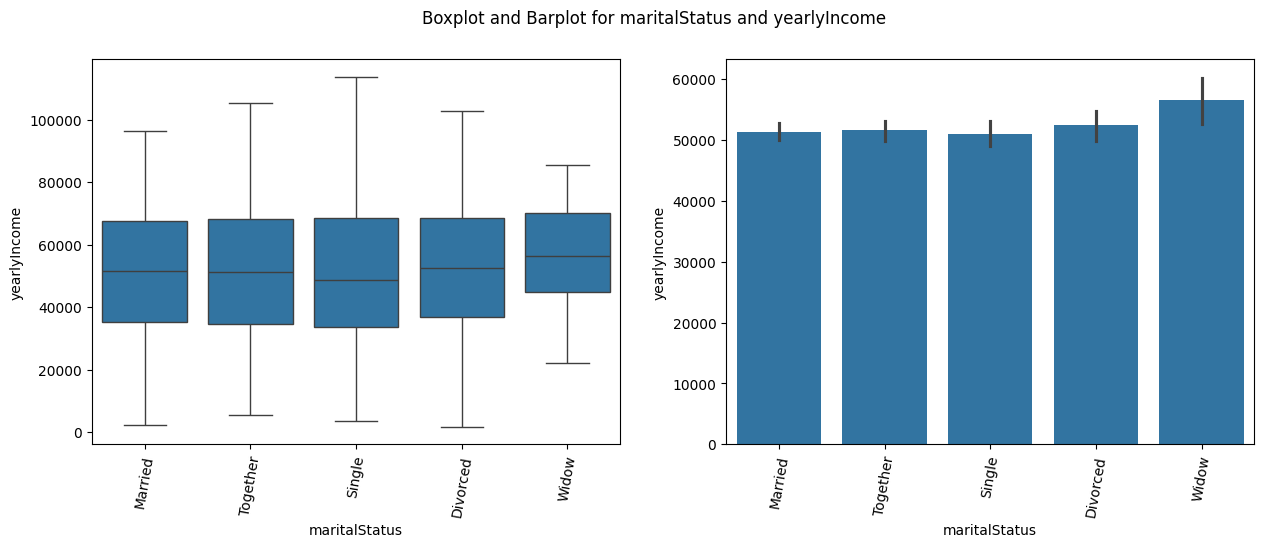

In [857]:
boxplot_barplot(customers_df, 'maritalStatus', 'yearlyIncome')

- Those that are not widows have very similar distribution of income while those that are widows make the most, though not by much, on average.

- There are, however, outliers for those that are married, together, or divorced.

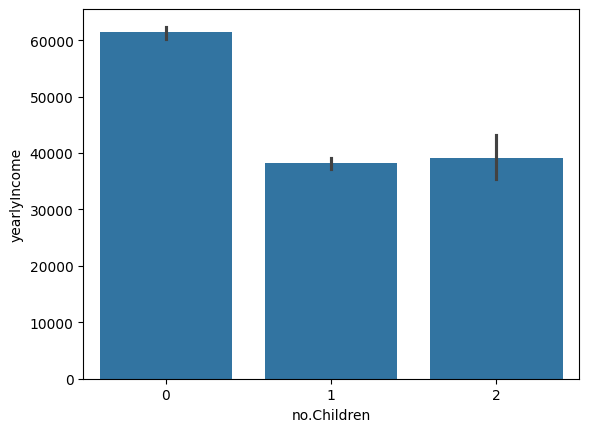

In [858]:
sns.barplot(x='no.Children', y='yearlyIncome', data=customers_df);

- Those with no children have the highest yearly income and not a major difference between those with either 1 or 2.

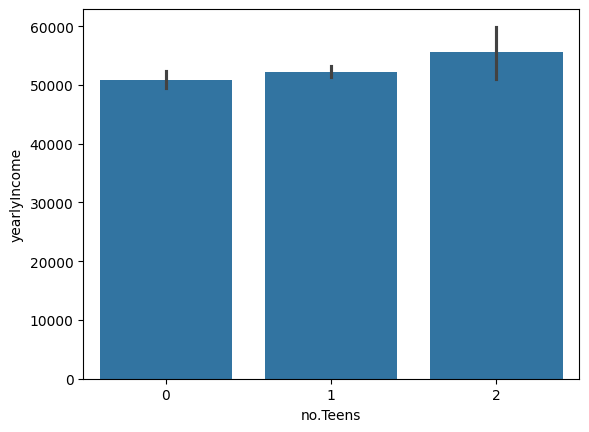

In [859]:
sns.barplot(x='no.Teens', y='yearlyIncome', data=customers_df);

### **Categoric Numeric Analysis**

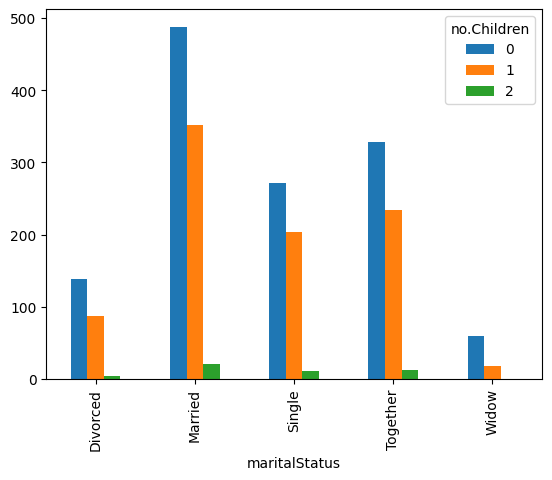

In [860]:
pd.crosstab(customers_df['maritalStatus'], customers_df['no.Children']).plot(kind='bar', stacked=False);

- Most customers don't have any children.

- Very few customers have 2 children.

- Widows have no children.

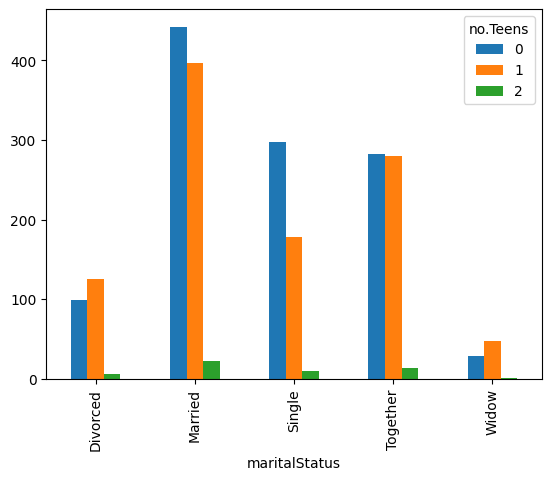

In [861]:
pd.crosstab(customers_df['maritalStatus'], customers_df['no.Teens']).plot(kind='bar', stacked=False);

- All marital statuses have significant amount of customers with one teen.

- Married couples have the most amount of teens.

### **Feature Engineering and Data Processing**


#### **Missing Values**

In [862]:
customers_df['yearlyIncome'].mean()

51622.0947845805

In [863]:
# Replace missing values with mean of yearly income
customers_df.loc[customers_df['yearlyIncome'].isnull(), 'yearlyIncome'] = 51958

In [864]:
# Check if any more missing values
customers_df.isnull().sum()

ID                      0
birthYear               0
maxEducation            0
maritalStatus           0
yearlyIncome            0
no.Children             0
no.Teens                0
enrollmentDate          0
no.DaysLastPurchase     0
amountSpentWine         0
amountSpentFruit        0
amountSpentMeat         0
amountSpentFish         0
amountSpentSweets       0
amountSpentGold         0
no.DiscountPurchases    0
no.OnlinePurchases      0
no.CatalogPurchases     0
no.StorePurchases       0
no.WebVisitsMonthly     0
accepted3rdOffer        0
accepted4thOffer        0
accepted5thOffer        0
accepted1stOffer        0
accepted2ndOffer        0
complained              0
acceptedLatestOffer     0
dtype: int64

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



#### **Age**

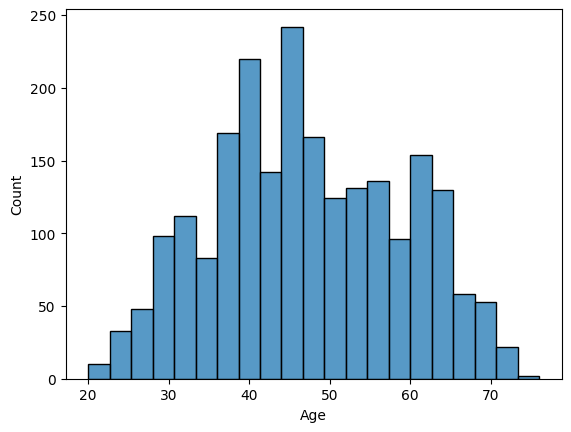

In [865]:
# Calculate the age of each customer
customers_df['Age'] = 2016 - customers_df['birthYear']

# Plot the distribution of age
histogram(customers_df, 'Age')

- Distribution is roughly normal but multimodal as well.

- Significant spikes around ages 30, 40, 45, and 60.

#### **Kids**

In [866]:
# Calculate the total number of kids under 18 years of age
customers_df['no.Kids'] = customers_df['no.Children'] + customers_df['no.Teens']

#### **Total Family Members**

In [867]:
# Function to calculate the total number of family members
def calculate_family_members(row):

  marital_status = row['maritalStatus']

  no_of_kids = row['no.Kids']

  if marital_status in ['Married', 'Together']:
    return 2 + no_of_kids
  return 1 + no_of_kids

customers_df['no.FamilyMembers'] = customers_df.apply(calculate_family_members, axis=1) # Passing the row argument via axis=1

#### **Relationship Status**

In [868]:
# Define the mapping
relationship_mapping = {
    'Married': 1,
    'Together': 1,
    'Divorced': 0,
    'Single': 0,
    'Widow': 0
}

# Apply the mapping
customers_df['relationship?'] = customers_df['maritalStatus'].map(relationship_mapping)


#### **Total Expenses**

In [869]:
# Calculate the total amount spent on all goods
customers_df['totalExpenses'] = customers_df[['amountSpentWine', 'amountSpentFruit', 'amountSpentMeat', 'amountSpentFish', 'amountSpentSweets', 'amountSpentGold']].sum(axis=1)


#### **Loyalty**

In [870]:
# Calculate how long the customer has been with the company
customers_df['no.LoyalYears'] = 2017 - pd.to_datetime(customers_df['enrollmentDate']).dt.year

#### **Offers Accepted**

In [871]:
# Calculate how many offers the customer accepted
customers_df['totalOffersAccepted'] = customers_df['accepted1stOffer'] + customers_df['accepted2ndOffer'] + customers_df['accepted3rdOffer'] + customers_df['accepted4thOffer'] + customers_df['accepted5thOffer'] + customers_df['acceptedLatestOffer']

#### **Total Number of Purchases**

In [872]:
# Calculate total number of purchases for each customer where amount is greater than 0
customers_df['totalPurchases'] = customers_df[['amountSpentWine', 'amountSpentFruit',
                                                'amountSpentMeat', 'amountSpentFish',
                                                'amountSpentSweets', 'amountSpentGold']].gt(0).sum(axis=1)

#### **Amount Per Purchase**

In [873]:
# Calculate amount spent per purchase for each customer
customers_df['amountPerPurchase'] = customers_df['totalExpenses'] / customers_df['totalPurchases']

#### **Income vs Expenses**

Text(0, 0.5, 'Expenses')

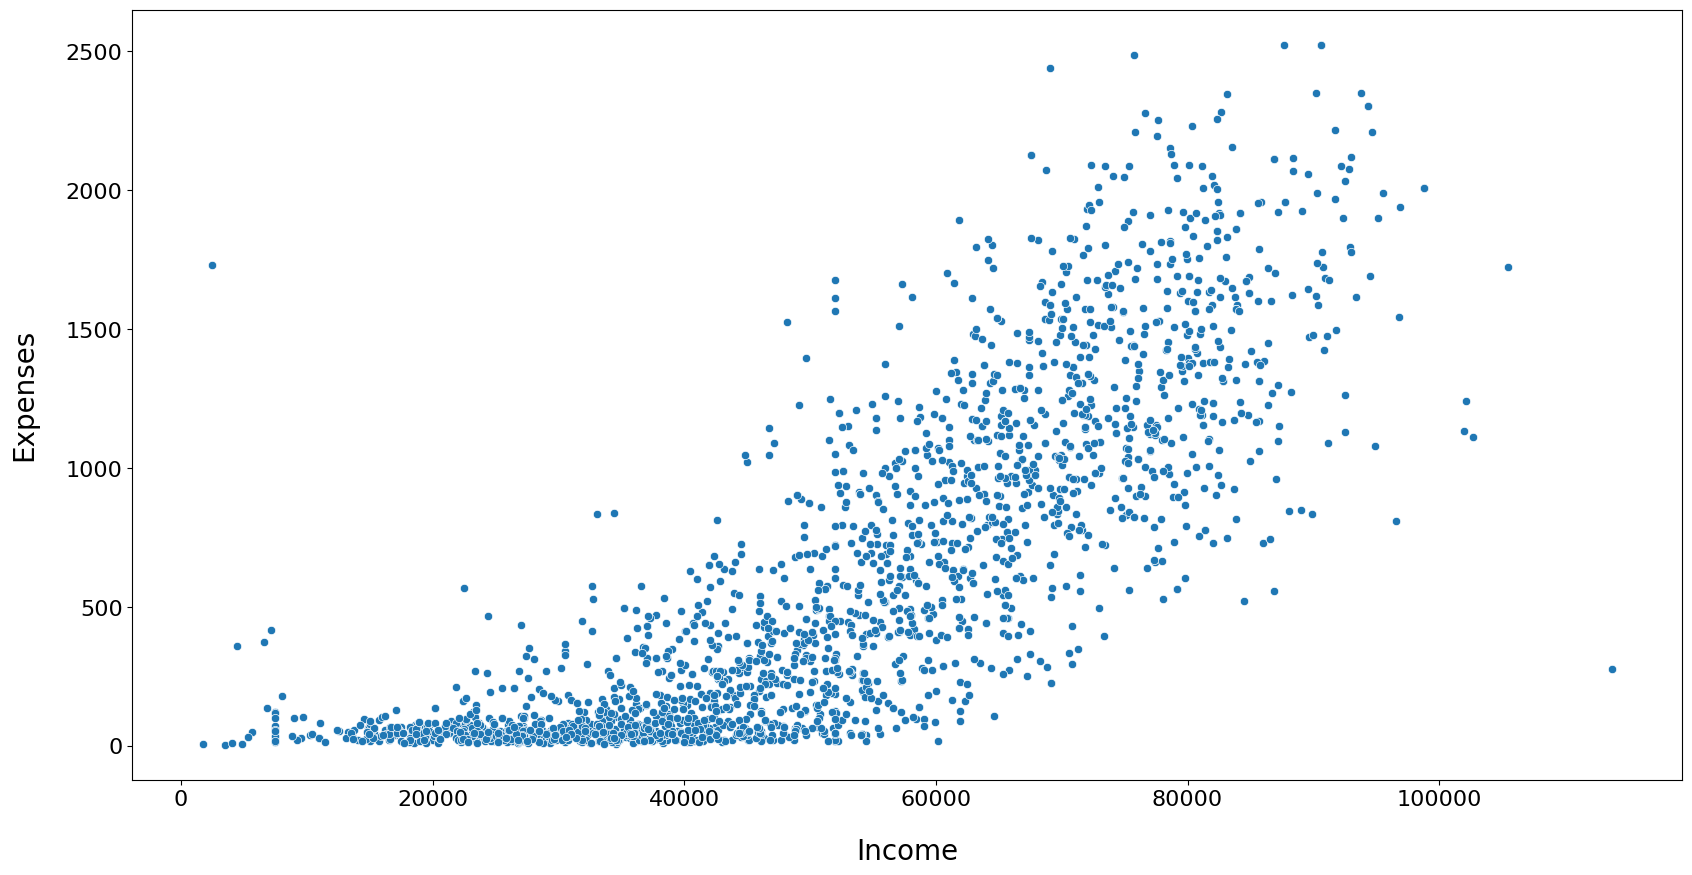

In [874]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(data=customers_df, x="yearlyIncome", y="totalExpenses")

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

- Total expenses increase significantly for most customers that make $60,000 or more.

#### **Family Size v Income**

Text(0, 0.5, 'Income')

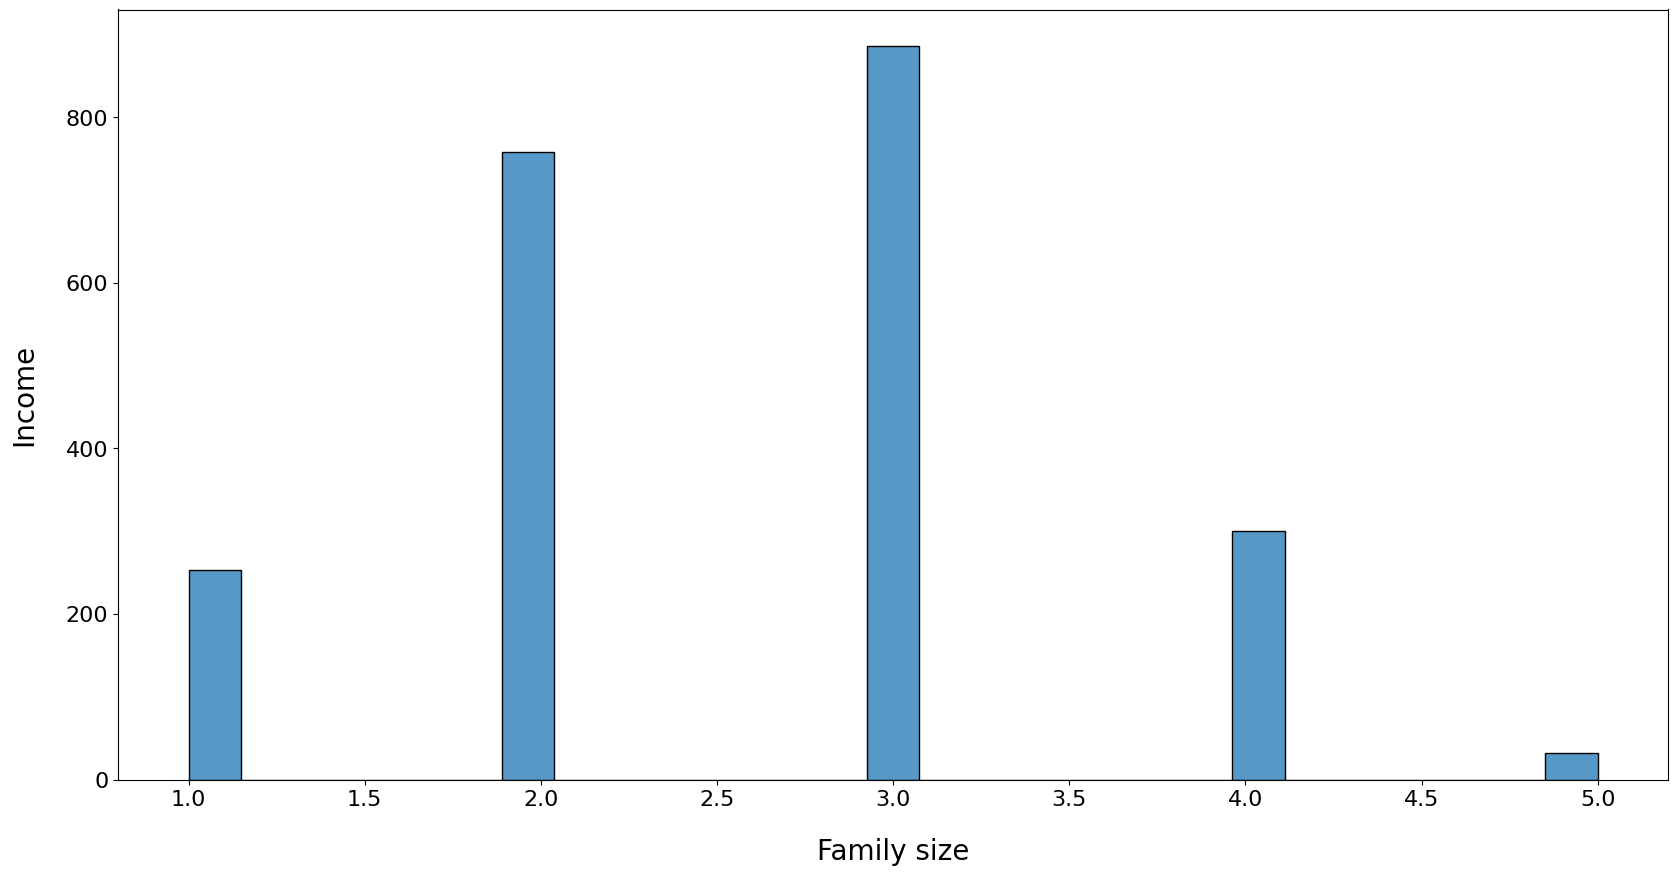

In [875]:
# Plot the bar plot with Expenses on Y-axis and Income on X-axis

plt.figure(figsize=(20, 10))                                    # Setting the plot size

histogram(customers_df, "no.FamilyMembers", "yearlyIncome")

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Family size", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Income", fontsize=20, labelpad=20)                # Title of Y-axis

- Families of three people also tend to make the most money.

- Customer's with a family size of 5, the largest for this set of customers, tend to make the least amount of income.

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

In [876]:
customers_df.head()

ID  birthYear maxEducation maritalStatus  yearlyIncome  no.Children  \
0  5524       1957      College        Single       58138.0            0   
1  2174       1954      College        Single       46344.0            1   
2  4141       1965      College      Together       71613.0            0   
3  6182       1984      College      Together       26646.0            1   
4  5324       1981          PhD       Married       58293.0            1   

   no.Teens enrollmentDate  no.DaysLastPurchase  amountSpentWine  ...  \
0         0     2012-09-04                   58              635  ...   
1         1     2014-03-08                   38               11  ...   
2         0     2013-08-21                   26              426  ...   
3         0     2014-02-10                   26               11  ...   
4         0     2014-01-19                   94              173  ...   

   acceptedLatestOffer  Age  no.Kids  no.FamilyMembers  relationship?  \
0                    1   59        0                 1              0   
1                    0   62        2                 3              0   
2                    0   51        0                 2              1   
3                    0   32        1                 3              1   
4                    0   35        1                 3              1   

   totalExpenses  no.LoyalYears  totalOffersAccepted  totalPurchases  \
0           1617              5                    1               6   
1             27              3                    0               6   
2            776              4                    0               6   
3             53              3                    0               6   
4            422              3                    0               6   

   amountPerPurchase  
0         269.500000  
1           4.500000  
2         129.333333  
3           8.833333  
4          70.333333  

[5 rows x 36 columns]

In [877]:
customers_df.columns

Index(['ID', 'birthYear', 'maxEducation', 'maritalStatus', 'yearlyIncome',
       'no.Children', 'no.Teens', 'enrollmentDate', 'no.DaysLastPurchase',
       'amountSpentWine', 'amountSpentFruit', 'amountSpentMeat',
       'amountSpentFish', 'amountSpentSweets', 'amountSpentGold',
       'no.DiscountPurchases', 'no.OnlinePurchases', 'no.CatalogPurchases',
       'no.StorePurchases', 'no.WebVisitsMonthly', 'accepted3rdOffer',
       'accepted4thOffer', 'accepted5thOffer', 'accepted1stOffer',
       'accepted2ndOffer', 'complained', 'acceptedLatestOffer', 'Age',
       'no.Kids', 'no.FamilyMembers', 'relationship?', 'totalExpenses',
       'no.LoyalYears', 'totalOffersAccepted', 'totalPurchases',
       'amountPerPurchase'],
      dtype='object')

In [878]:
# Drop irrelevant columns
behavioral_data = customers_df.drop(columns=['ID', 'birthYear', 'maxEducation', 'maritalStatus', 'yearlyIncome', 'no.Children', 'no.Teens', 'enrollmentDate', 'amountSpentWine', 'amountSpentFruit', 'amountSpentMeat',
       'amountSpentFish', 'amountSpentSweets', 'amountSpentGold', 'accepted3rdOffer',
       'accepted4thOffer', 'accepted5thOffer', 'accepted1stOffer',
       'accepted2ndOffer', 'acceptedLatestOffer', 'complained', 'Age', 'no.Kids', 'no.FamilyMembers', 'relationship?'], axis=1)

behavioral_data.head()

no.DaysLastPurchase  no.DiscountPurchases  no.OnlinePurchases  \
0                   58                     3                   8   
1                   38                     2                   1   
2                   26                     1                   8   
3                   26                     2                   2   
4                   94                     5                   5   

   no.CatalogPurchases  no.StorePurchases  no.WebVisitsMonthly  totalExpenses  \
0                   10                  4                    7           1617   
1                    1                  2                    5             27   
2                    2                 10                    4            776   
3                    0                  4                    6             53   
4                    3                  6                    5            422   

   no.LoyalYears  totalOffersAccepted  totalPurchases  amountPerPurchase  
0              5                    1               6         269.500000  
1              3                    0               6           4.500000  
2              4                    0               6         129.333333  
3              3                    0               6           8.833333  
4              3                    0               6          70.333333

In [879]:
behavioral_data.shape

(2229, 11)

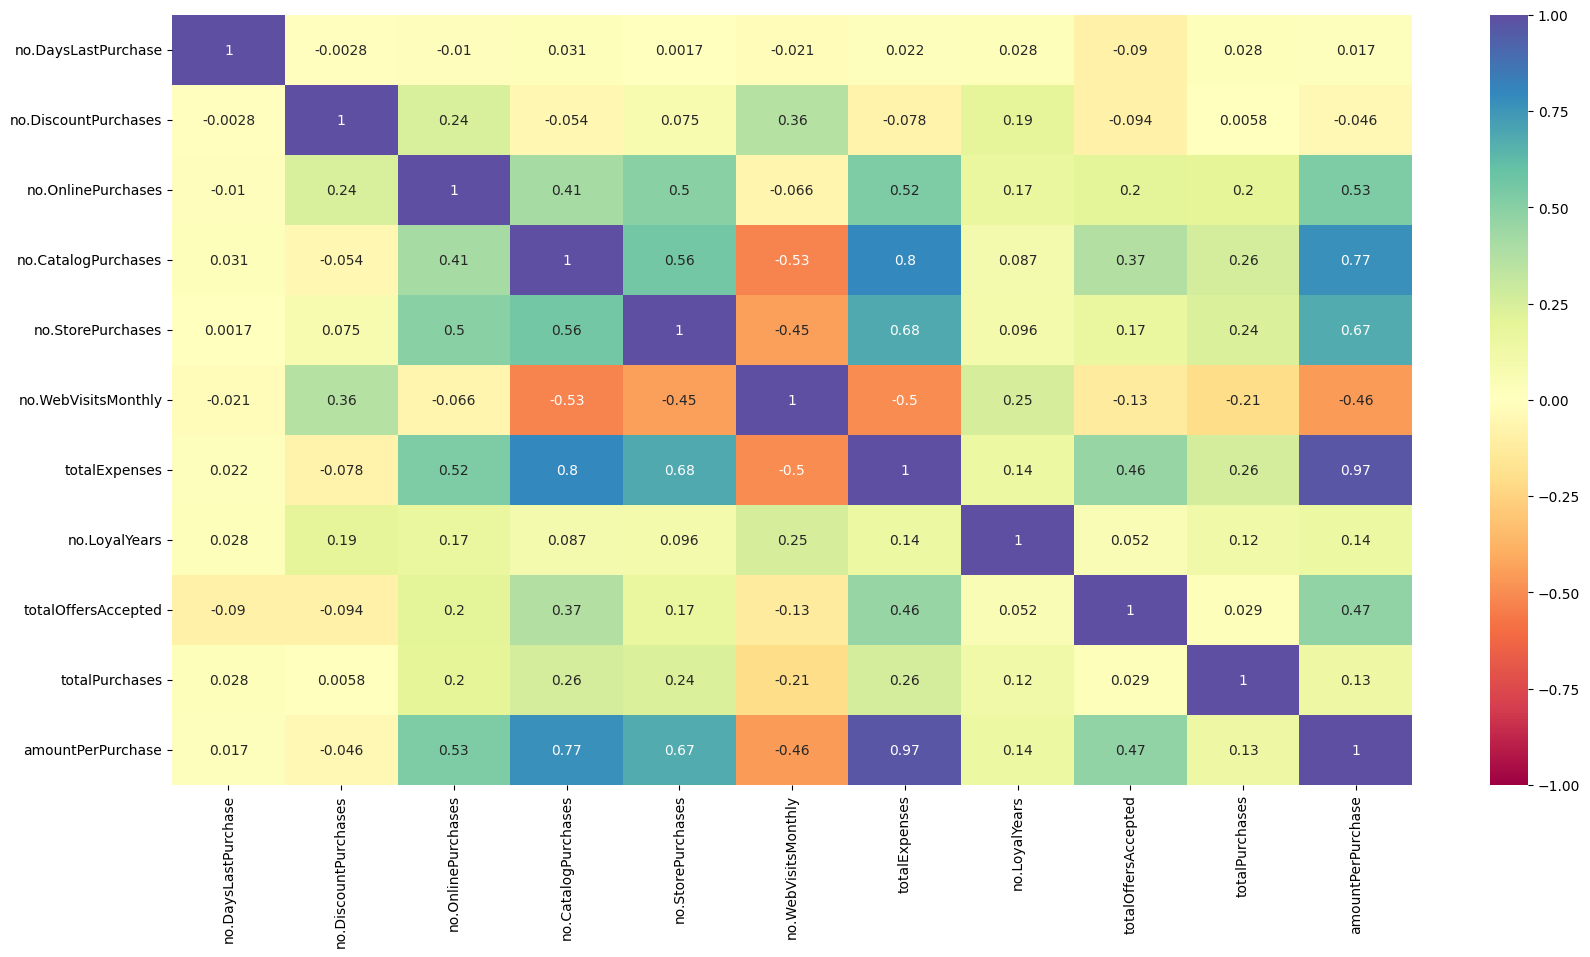

In [880]:
plt.figure(figsize=(20, 10))

sns.heatmap(behavioral_data.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

plt.show();

- There is very strong positive correlation between total expenses and the amount spent per purchase

- There is strong positive correlation between total expenses and the number of catalog purchases

- There is strong positive correlation between the amount spent per purchase and the number of catalog

- There is moderate positive correlation between the number of store purchases and total expenses and the amount spent per purchase

### **Scaling the Data**

In [881]:
# Scale the data
scaled_behavioral_data = StandardScaler().fit_transform(behavioral_data)

# Convert the embeddings to a dataframe
scaled_behavioral_df = pd.DataFrame(scaled_behavioral_data, columns=behavioral_data.columns)

scaled_behavioral_df.head()

no.DaysLastPurchase  no.DiscountPurchases  no.OnlinePurchases  \
0             0.307314              0.358938            1.405471   
1            -0.383771             -0.168815           -1.117198   
2            -0.798422             -0.696567            1.405471   
3            -0.798422             -0.168815           -0.756817   
4             1.551268              1.414444            0.324327   

   no.CatalogPurchases  no.StorePurchases  no.WebVisitsMonthly  totalExpenses  \
0             2.633984          -0.559160             0.689920       1.683247   
1            -0.585437          -1.176175            -0.138430      -0.962795   
2            -0.227723           1.291882            -0.552605       0.283674   
3            -0.943150          -0.559160             0.275745      -0.919526   
4             0.129990           0.057854            -0.138430      -0.305445   

   no.LoyalYears  totalOffersAccepted  totalPurchases  amountPerPurchase  
0       1.500215             0.620076        0.618443           1.484522  
1      -1.420291            -0.503623        0.618443          -0.967909  
2       0.039962            -0.503623        0.618443           0.187356  
3      -1.420291            -0.503623        0.618443          -0.927806  
4      -1.420291            -0.503623        0.618443          -0.358657

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

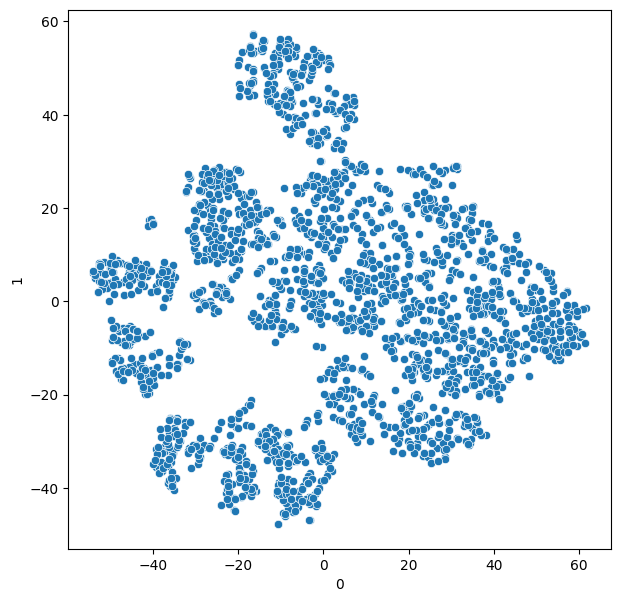

In [882]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)

# Fit and transform the data
data_tsne = tsne.fit_transform(scaled_behavioral_df)

# Convert the embeddings to a data frame
tsne_data_df = pd.DataFrame(data_tsne, columns = [0, 1])

# Scatter plot for two components
plt.figure(figsize = (7,7))

sns.scatterplot(x = 0, y = 1, data = tsne_data_df)

plt.show()

**Observation and Insights:**

- There are several clusters that appear in the visualization of the t-SNE embeddings.

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

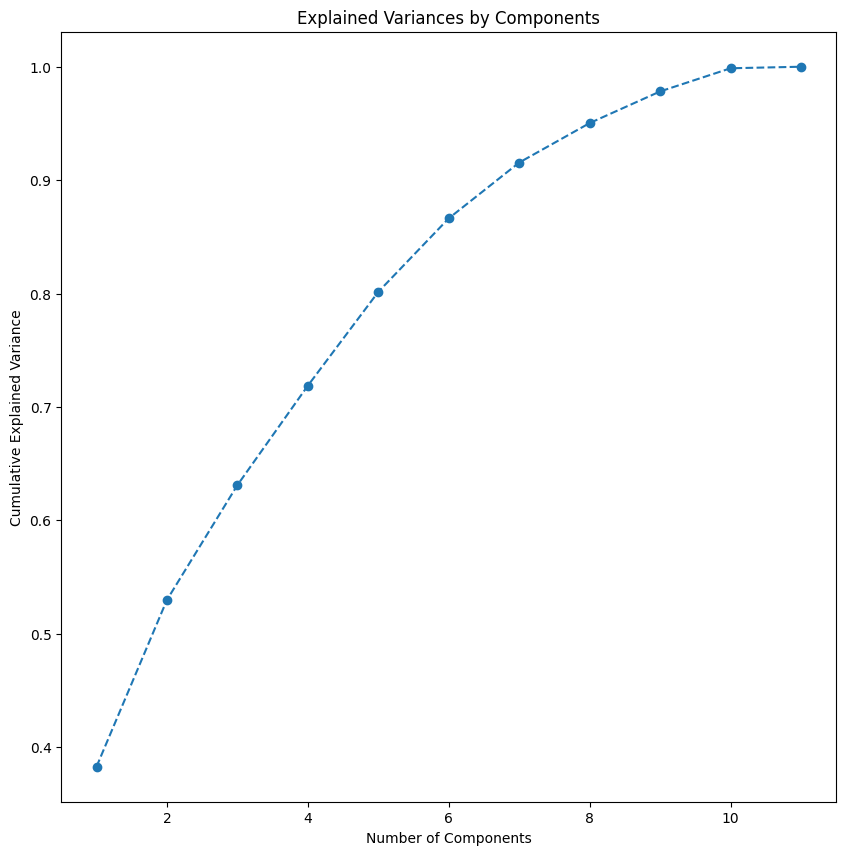

In [883]:
# Defining the number of principal components to generate
n = scaled_behavioral_df.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

# Fit the scaled data to the PCA model
pca_data = pca.fit_transform(scaled_behavioral_df)

# Create a data frame of the transformed data
pca_data_df = pd.DataFrame(pca_data)

# The percentage of variance explained by each principal component
variance_percentages = pca.explained_variance_ratio_

# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, n + 1), variance_percentages.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [884]:
# Finding the least number of components that can explain at least 70% variance
aggregate = 0

for index, value in enumerate(variance_percentages):

    aggregate += value

    if (aggregate >= 0.7):

        print("Number of PCs that explain at least 70% variance:", index + 1)

        break

Number of PCs that explain at least 70% variance: 4


## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

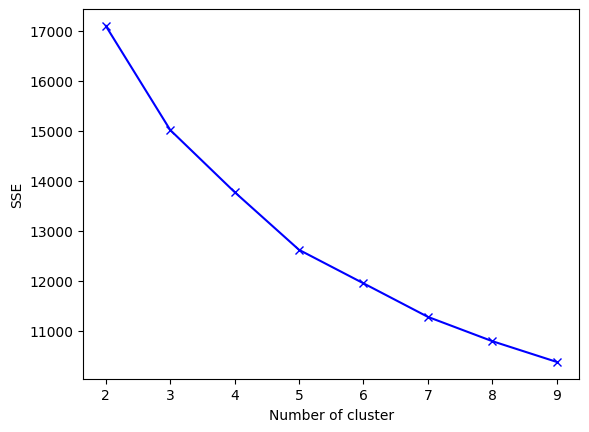

In [885]:
# Empty dictionary to store the Sum of the Squared Error for each value of K
sse = {}

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(pca_data_df)

  sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel('Number of cluster')

plt.ylabel('SSE')

plt.show()

- The 'elbow' bend appears to be at clusters **3** and **5** but will employ Silhouette Score to verify.

For n_clusters = 3, the silhouette score is 0.23303627299518961)
For n_clusters = 4, the silhouette score is 0.22514245018115467)
For n_clusters = 5, the silhouette score is 0.19662188688742763)
For n_clusters = 6, the silhouette score is 0.18922911759417516)


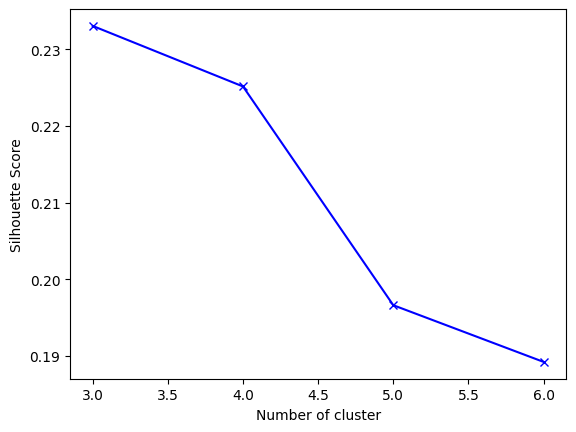

In [886]:
sc = {}

for k in range(3, 7):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(pca_data_df)

  labels = kmeans.predict(pca_data_df)

  sc[k] = silhouette_score(pca_data_df, labels)

  # Print the silhouette score
  print( "For n_clusters = {}, the silhouette score is {})".format(k, sc[k]))

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel('Number of cluster')

plt.ylabel('Silhouette Score')

plt.show()

- **3** clusters has the highest Silhouette Score, and thus, the optimal number of clusters.

### **Applying KMeans on the PCA data and visualize the clusters**

In [887]:
# Instantiate KMeans model
kmeans_pca = KMeans(n_clusters = 3, random_state=1)

# Fit PCA-transformed data to K-Means model
kmeans_pca.fit(pca_data_df)

pca_data_df["K_means_segments_3"] = kmeans_pca.labels_

customers_df["K_means_segments_3"] = kmeans_pca.labels_

behavioral_data["K_means_segments_3"] = kmeans_pca.labels_

In [888]:
behavioral_data['K_means_segments_3'].value_counts()

K_means_segments_3
1    1022
2     645
0     562
Name: count, dtype: int64

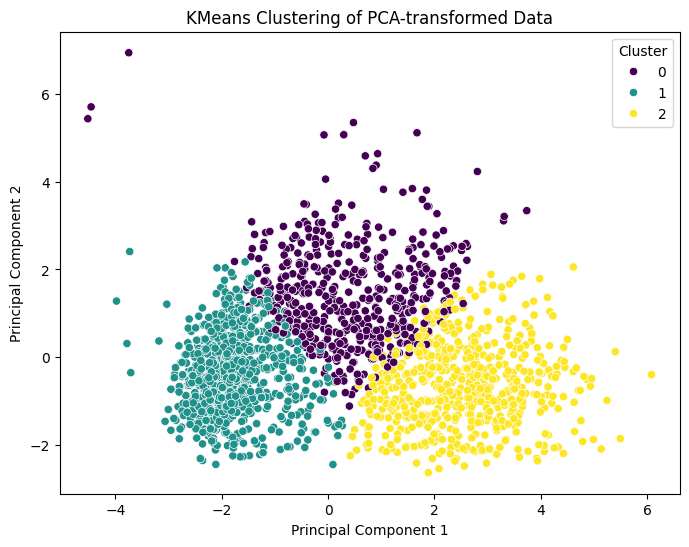

In [889]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

sns.scatterplot(x = 0, y = 1, data=pca_data_df, hue = "K_means_segments_3", palette = 'viridis')

plt.title('KMeans Clustering of PCA-transformed Data')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')

plt.show()

**Observations and Insights:**

- Clusters **1** and **2** appear to be on opposite ends of each other with cluster **0** wedged in between.

- There is a bit of overlap with cluster **0** from the other two clusters.

### **Cluster Profiling**

In [890]:
# Taking the cluster-wise mean of all the variables.
cluster_profile_KMeans_3 = behavioral_data.groupby('K_means_segments_3').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="darkgreen", axis=0)

In [891]:
# Columns to use in boxplot
col_for_box = ['yearlyIncome','no.DaysLastPurchase','no.DiscountPurchases','no.OnlinePurchases','no.StorePurchases','no.WebVisitsMonthly','Age','no.FamilyMembers','totalExpenses','totalPurchases','no.LoyalYears','totalOffersAccepted','amountPerPurchase']

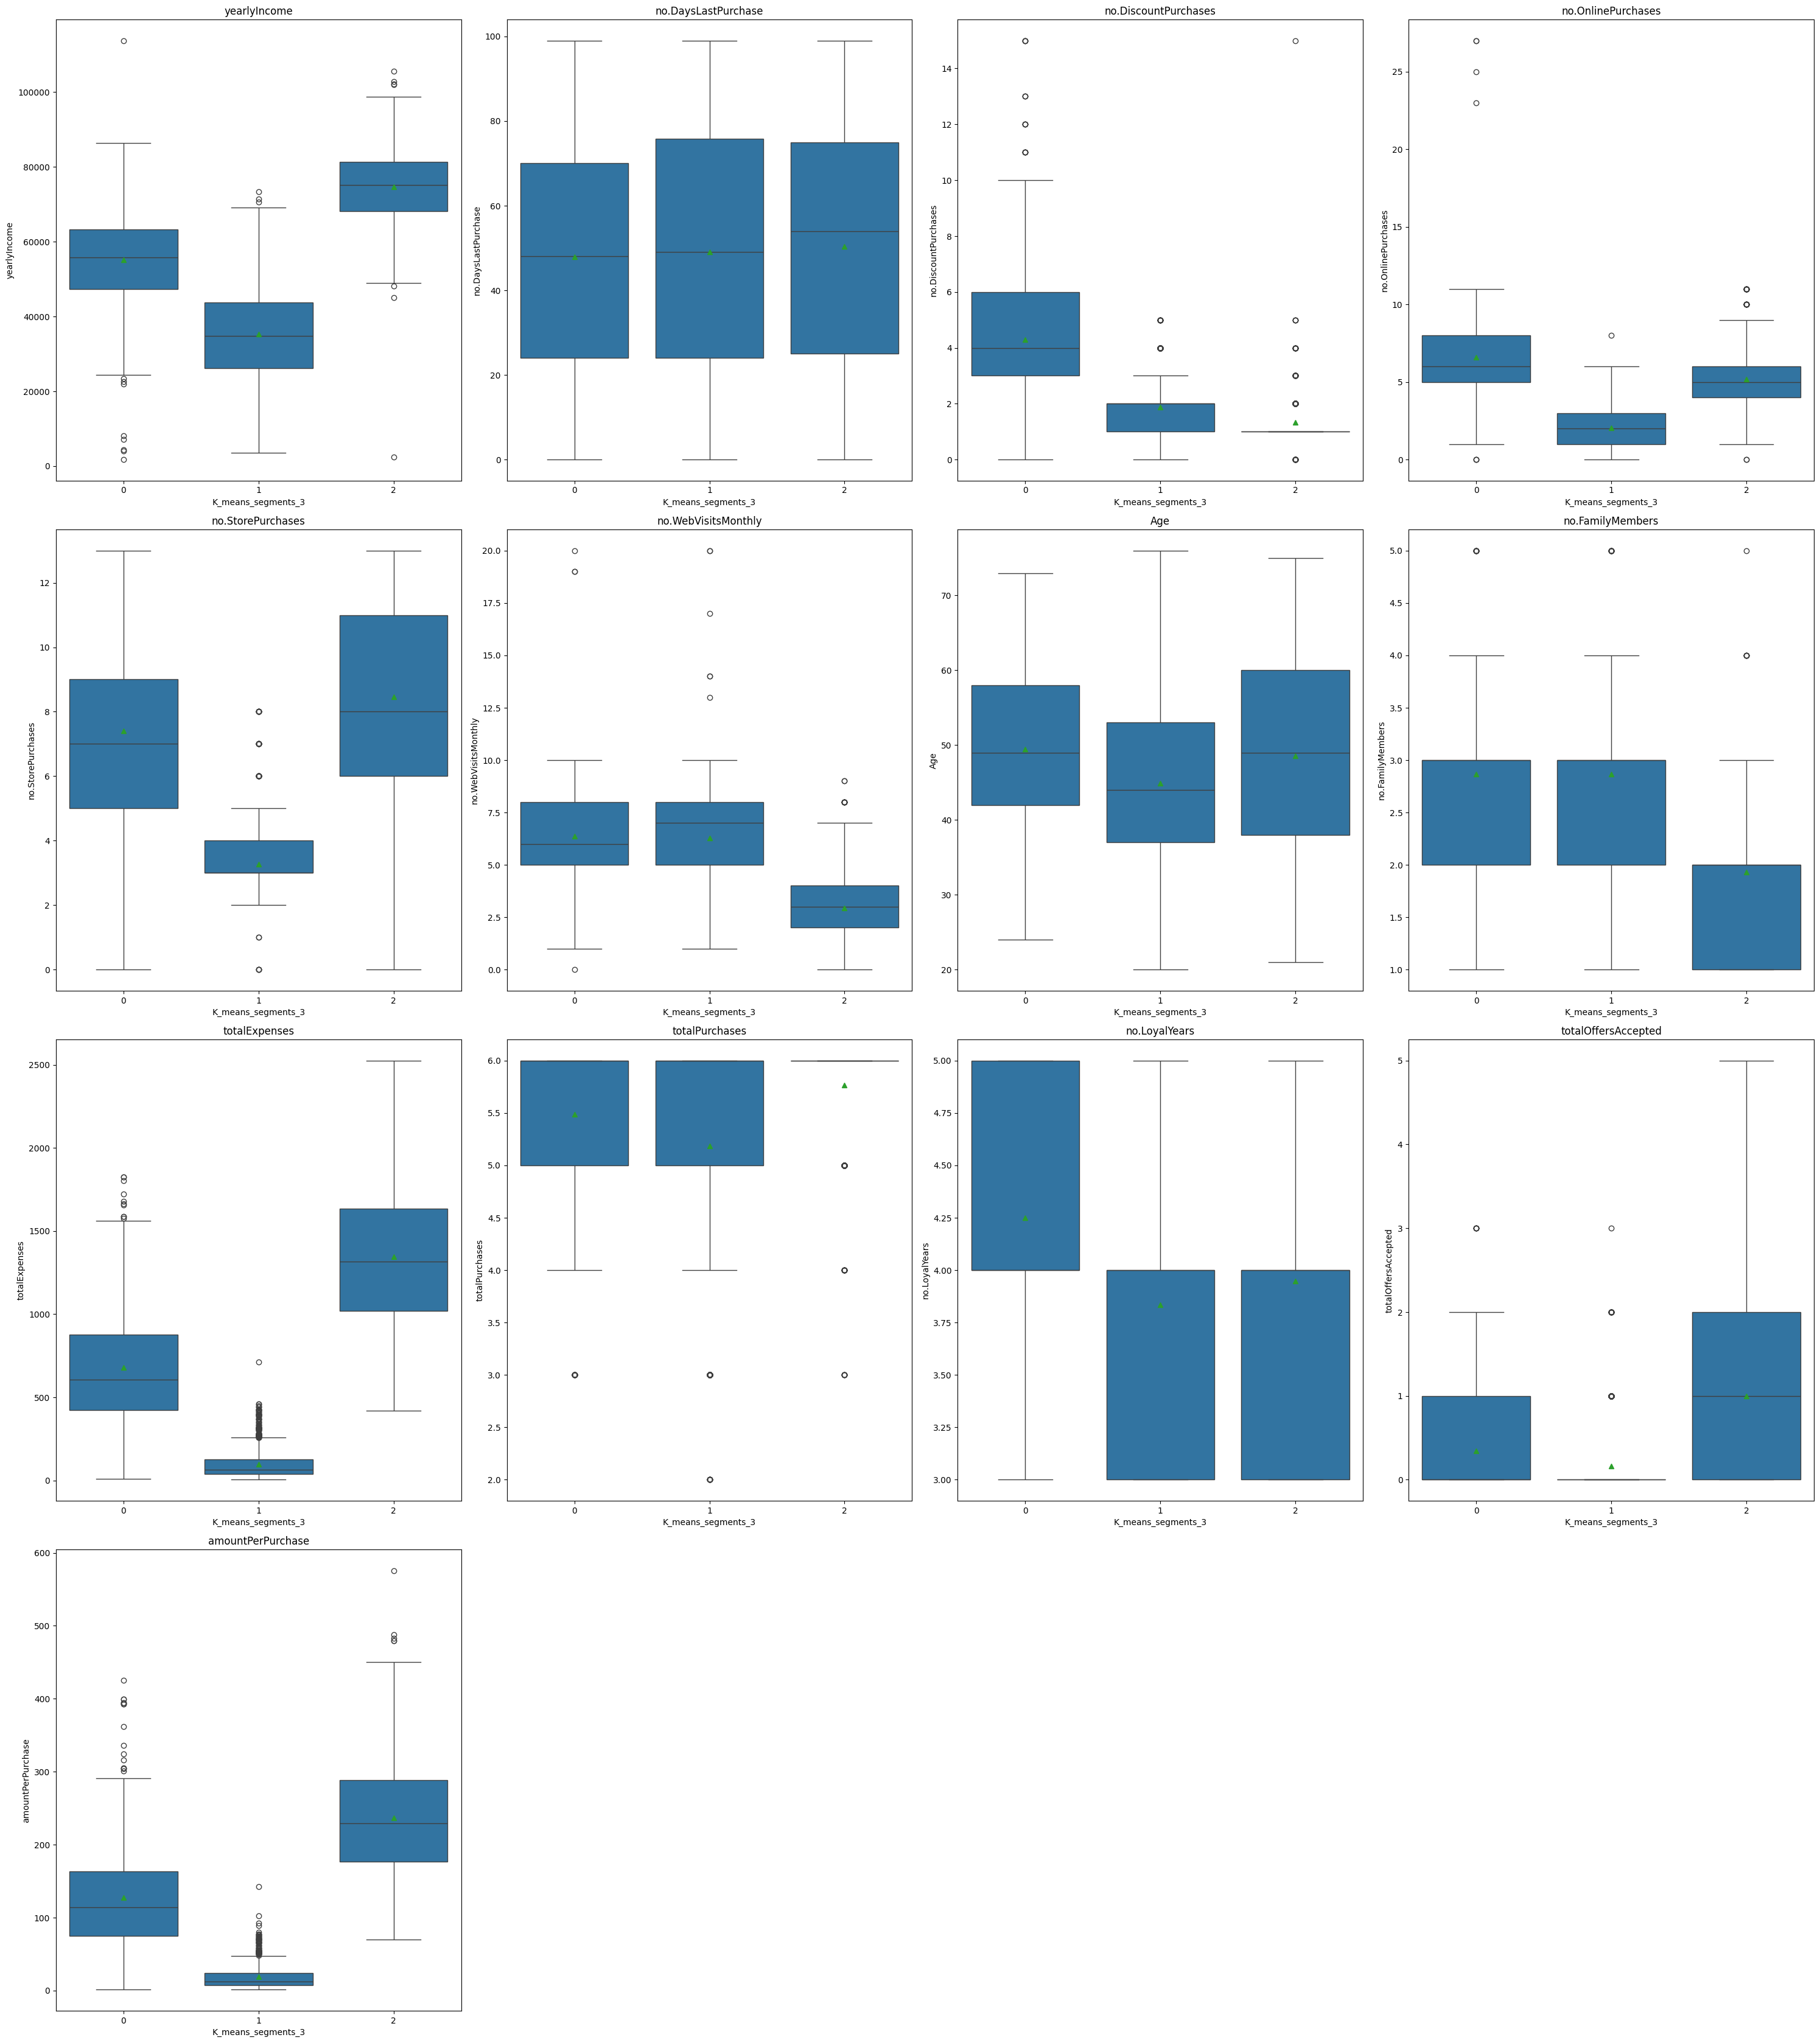

In [892]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=customers_df[variable], x=customers_df['K_means_segments_3'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Describe the characteristics of each cluster**

**Summary of each cluster:**

**Segment 0**:

Income: Middle-income, averaging around $55,000.
Family Composition: Most have 1 child, and either no teens or 2 teens; few have 1 teen.
Purchase Frequency: Half haven’t made a purchase in 25-70 days.
Spending Patterns: Moderate spending on wine, fruit, meat, fish, sweets, and gold, with significant outliers.
Discount Purchases: Highest number of discounted purchases.
Channel Engagement: Most online purchases, second-most store purchases, and second-highest website visits.
Demographics: Average age around 50, with half of the segment comprised of 2-3 family members.
Expenses: Second-highest total expenses.
Purchasing Behavior: Typically 5-6 total purchases, second-highest amount spent per purchase.
Loyalty & Offers: Most loyal customers and second-highest offer acceptance.
Summary: Segment 0 customers are moderately affluent and exhibit a strong loyalty to the brand. They are highly active online and in stores, making frequent purchases and taking advantage of discounts. Their spending habits show a wide range, with some high outliers. They represent an engaged, mid-range spending group that is moderately responsive to promotions.

**Segment 1**:

Income: Lowest income, averaging around $35,000.
Family Composition: Similar to Segment 0, with 0-1 teens.
Purchase Frequency: Second-longest time since the last purchase.
Spending Patterns: Lowest spending on wine, fruit, meat, fish, sweets, and gold, with notable outliers.
Discount Purchases: Second-highest number of discounted purchases.
Channel Engagement: Second-highest online and store purchases, but the highest number of website visits.
Demographics: Younger customers with an average age of 45; similar family size as Segment 0.
Expenses: Lowest total expenses, lowest amount spent per purchase.
Purchasing Behavior: Typically no more than 6 total purchases.
Loyalty & Offers: Loyalty of 4 years or less, least acceptance of offers.
Summary: Segment 1 represents younger, low-income customers who spend minimally across all categories. Despite high engagement online through frequent website visits, they make fewer purchases and spend less overall. This group is less loyal and least responsive to offers, making them a potential target for increased engagement efforts.

**Segment 2**:

Income: Highest income among the segments.
Family Composition: Fewest children, mostly 0-1 teens.
Purchase Frequency: Longest time since the last purchase.
Spending Patterns: Highest spending on wine, fruit, meat, fish, sweets, and gold.
Discount Purchases: Fewest discounted purchases.
Channel Engagement: Second-highest online purchases, highest store purchases, and lowest website visits.
Demographics: Average age around 50, with significant age distribution.
Expenses: Highest total expenses, highest amount spent per purchase.
Purchasing Behavior: Typically 6 total purchases.
Loyalty & Offers: Loyalty of 4 years or less, highest acceptance of offers.
Summary: Segment 2 consists of affluent customers who spend the most across multiple categories, particularly in-store. Despite fewer discounted purchases and website visits, they are the highest spenders per purchase and are highly responsive to offers. This group is ideal for high-end marketing and retention strategies, with a strong focus on maximizing in-store engagement and tailored promotions.

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

In [893]:
# Dropping labels we got from K=3 since we will be using PCA data for prediction
pca_data_df.drop('K_means_segments_3', axis=1, inplace=True)

# Drop K_means_segments_3.
customers_df.drop('K_means_segments_3', axis=1, inplace=True)

**K-Means using K = 5**

In [894]:
# Instantiate KMeans model
kmeans_5_pca = KMeans(n_clusters = 5, random_state=1)

# Fit PCA-transformed data to K-Means model
kmeans_5_pca.fit(pca_data_df)



KMeans(n_clusters=5, random_state=1)

In [895]:
silhouette_score(pca_data_df, kmeans_5_pca.labels_)

0.19662188688742763

In [896]:
pca_data_df["K_means_segments_5"] = kmeans_5_pca.labels_

customers_df["K_means_segments_5"] = kmeans_5_pca.labels_

behavioral_data["K_means_segments_5"] = kmeans_5_pca.labels_

In [897]:
# Let's check the distribution
customers_df['K_means_segments_5'].value_counts()

K_means_segments_5
0    832
1    545
3    412
2    228
4    212
Name: count, dtype: int64

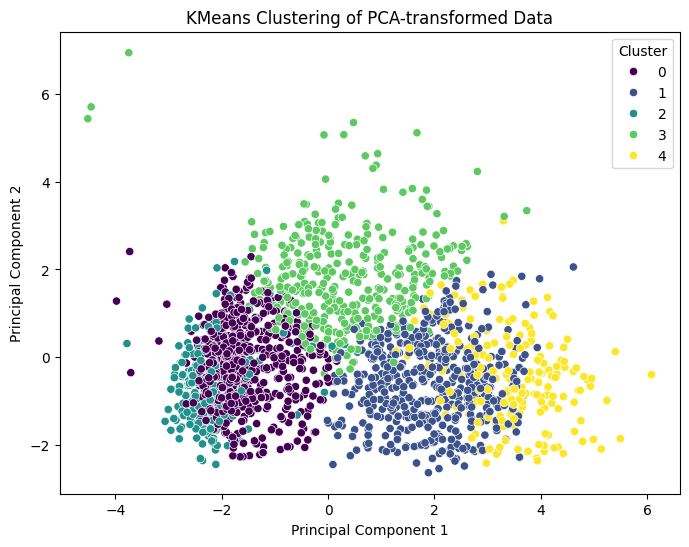

In [898]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

sns.scatterplot(x = 0, y = 1, data=pca_data_df, hue = "K_means_segments_5", palette = 'viridis')

plt.title('KMeans Clustering of PCA-transformed Data')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')

plt.show()

In [899]:
# Taking the cluster-wise mean of all the variables.
cluster_profile_KMeans_5 = behavioral_data.groupby('K_means_segments_5').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_5.style.highlight_max(color="darkgreen", axis=0)

**Segment 0:**

**Purchase Frequency:** Customers in Segment 0 have made purchases within approximately 48.68 days.

**Discount Purchases:** Moderate number of discount purchases (1.99 on average).

**Channel Engagement:** Moderate online purchases (2.30), low catalog purchases (0.67), and moderate store purchases (3.43). Website engagement is also moderate (6.33 visits per month).

**Expenses:** Low total expenses at 116.20.

**Loyalty & Offers:** Average loyalty at 3.91 years, low offer acceptance (0.17).

**Purchasing Behavior:** Total purchases average around 5.69, with a low average spend per purchase ($20.15).

**Summary:** Segment 0 represents low spenders who engage moderately across all purchasing channels. They have moderate loyalty but tend to make low-value purchases and are not highly responsive to offers.

**Segment 1:**

**Purchase Frequency:** Customers in Segment 1 have made purchases within 49.63 days on average.

**Discount Purchases:** Low number of discount purchases (1.57 on average).

**Channel Engagement:** High engagement in online purchases (5.11), catalog purchases (5.25), and store purchases (8.84). Website visits are moderate (3.03 visits per month).

**Expenses:** High total expenses at 1,121.41.

**Loyalty & Offers:** Moderate loyalty at 3.87 years, low offer acceptance (0.24).

**Purchasing Behavior:** Total purchases average around 5.83, with a high average spend per purchase ($193.65).

**Summary:** Segment 1 consists of high-spending customers who are highly engaged across multiple channels, particularly in-store and catalog purchases. They tend to make fewer discount purchases but spend significantly more per purchase. Despite low offer acceptance, they are valuable customers.

**Segment 2:**

Purchase Frequency: Customers in Segment 2 make purchases approximately every 48.56 days.
Discount Purchases: Moderate number of discount purchases (1.65).
Channel Engagement: Low online (1.68) and catalog (0.36) purchases, and moderate store purchases (3.03). Website visits are moderate (6.29 visits per month).
Expenses: Very low total expenses at 74.45.
Loyalty & Offers: Moderate loyalty at 3.67 years, low offer acceptance (0.17).
Purchasing Behavior: Total purchases average 3.34, with a low average spend per purchase ($23.07).
Summary: Segment 2 represents the lowest spenders, with minimal engagement in online and catalog purchases. These customers make very few purchases and spend little, with low loyalty and offer acceptance.

**Segment 3:**

Purchase Frequency: Customers in Segment 3 purchase about every 50.04 days.
Discount Purchases: Highest number of discount purchases (4.91).
Channel Engagement: Very high engagement across online (6.85), catalog (2.55), and store purchases (7.03). Website visits are high (6.75 visits per month).
Expenses: Moderate total expenses at 666.82.
Loyalty & Offers: Highest loyalty at 4.33 years, moderate offer acceptance (0.39).
Purchasing Behavior: Total purchases average 5.43, with a moderate amount spent per purchase ($126.87).
Summary: Segment 3 customers are highly engaged across all channels, frequently utilizing discounts. They show the highest loyalty and make moderate-value purchases, making them a valuable segment for retention strategies.

**Segment 4:**

Purchase Frequency: Customers in Segment 4 make purchases approximately every 48.21 days.
Discount Purchases: Lowest number of discount purchases (1.24).
Channel Engagement: Very high engagement in online (5.82), catalog (6.24), and store purchases (7.99). Website visits are low (3.58 visits per month).
Expenses: Very high total expenses at 1,651.90.
Loyalty & Offers: Moderate loyalty at 4.14 years, highest offer acceptance (2.50).
Purchasing Behavior: Total purchases average 5.62, with the highest average spend per purchase ($298.67).
Summary: Segment 4 consists of the highest-spending customers who engage heavily across multiple channels. They rarely use discounts but are highly responsive to offers. This segment represents premium customers who make high-value purchases and are ideal for targeted high-end promotions.

**Overall Insights:**

**Segment 0:** Low spenders with moderate engagement and loyalty, low offer acceptance, and low-value purchases.

**Segment 1:** High spenders with strong engagement across channels, particularly in-store and catalog, spending significantly more per purchase despite low offer acceptance.

**Segment 2:** The lowest spenders with minimal engagement and low loyalty, making very few purchases with low spending per transaction.

**Segment 3:** Moderate spenders with high engagement, frequently utilizing discounts, and the most loyal customers. They represent a valuable segment for retention strategies.

**Segment 4:** The highest-spending segment with the highest engagement and offer acceptance. These customers rarely use discounts and make the highest-value purchases, making them ideal for high-end marketing campaigns.

**Detailed insights:**
- Segment 4 identifies **premium customers** with high spending across multiple channels and high offer responsiveness.
- Segment 3 captures frequent **discount shoppers** who engage heavily and are highly loyal.
- Segment 2 represents **low-value** customers who make minimal purchases and have lower engagement.
- Segment 0 captures **moderate customers** with a balanced purchasing pattern, and Segment 1 focuses on **high catalog** and store shoppers.

In [900]:
# Dropping labels we got from K-Means since we will be using PCA data for prediction
pca_data_df.drop('K_means_segments_5', axis=1, inplace=True)
# Drop K_means_segments_5 from customers_df
customers_df.drop('K_means_segments_5', axis=1, inplace=True)

## **K-Medoids**

In [901]:
kmedo = KMedoids(n_clusters=5, random_state=1) # Initializing K-Medoids with number of clusters as 5 and random_state=1

preds = kmedo.fit_predict(pca_data_df) # Fit and predict K-Medoids using data_pca

score = silhouette_score(pca_data_df, preds) # Calculate the silhouette score

print(score)

0.117624704668435


In [902]:
# Predicting on pca_data_df and adding K-Medoids cluster labels to the customers_df
customers_df["KMedoids_Labels"] = kmedo.labels_

# Predicting on pca_data_df  and adding K-Medoids cluster labels to behavioral_data
behavioral_data["KMedoids_Labels"] = kmedo.labels_

# Predicting on pca_data_df  and adding K-Medoids cluster labels to pca_data_df
pca_data_df["KMedoids_Labels"] = kmedo.labels_

In [903]:
# Check the distribution
customers_df['KMedoids_Labels'].value_counts()


KMedoids_Labels
4    643
2    536
0    432
1    331
3    287
Name: count, dtype: int64

### **Visualize the clusters using PCA**

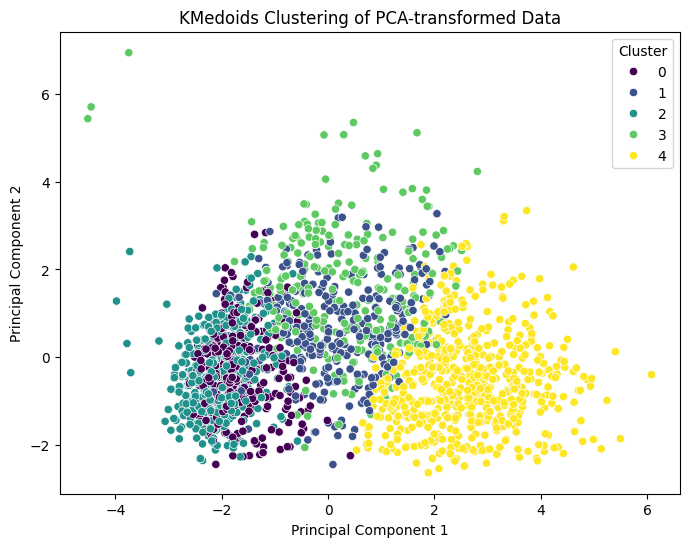

In [904]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

sns.scatterplot(x = 0, y = 1, data=pca_data_df, hue = "KMedoids_Labels", palette = 'viridis')

plt.title('KMedoids Clustering of PCA-transformed Data')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')

plt.show()

### **Cluster Profiling**

In [905]:
# Taking the cluster-wise mean of all the variables.
cluster_profile_KMedo_5 = behavioral_data.groupby('KMedoids_Labels').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMedo_5.style.highlight_max(color="darkgreen", axis=0)

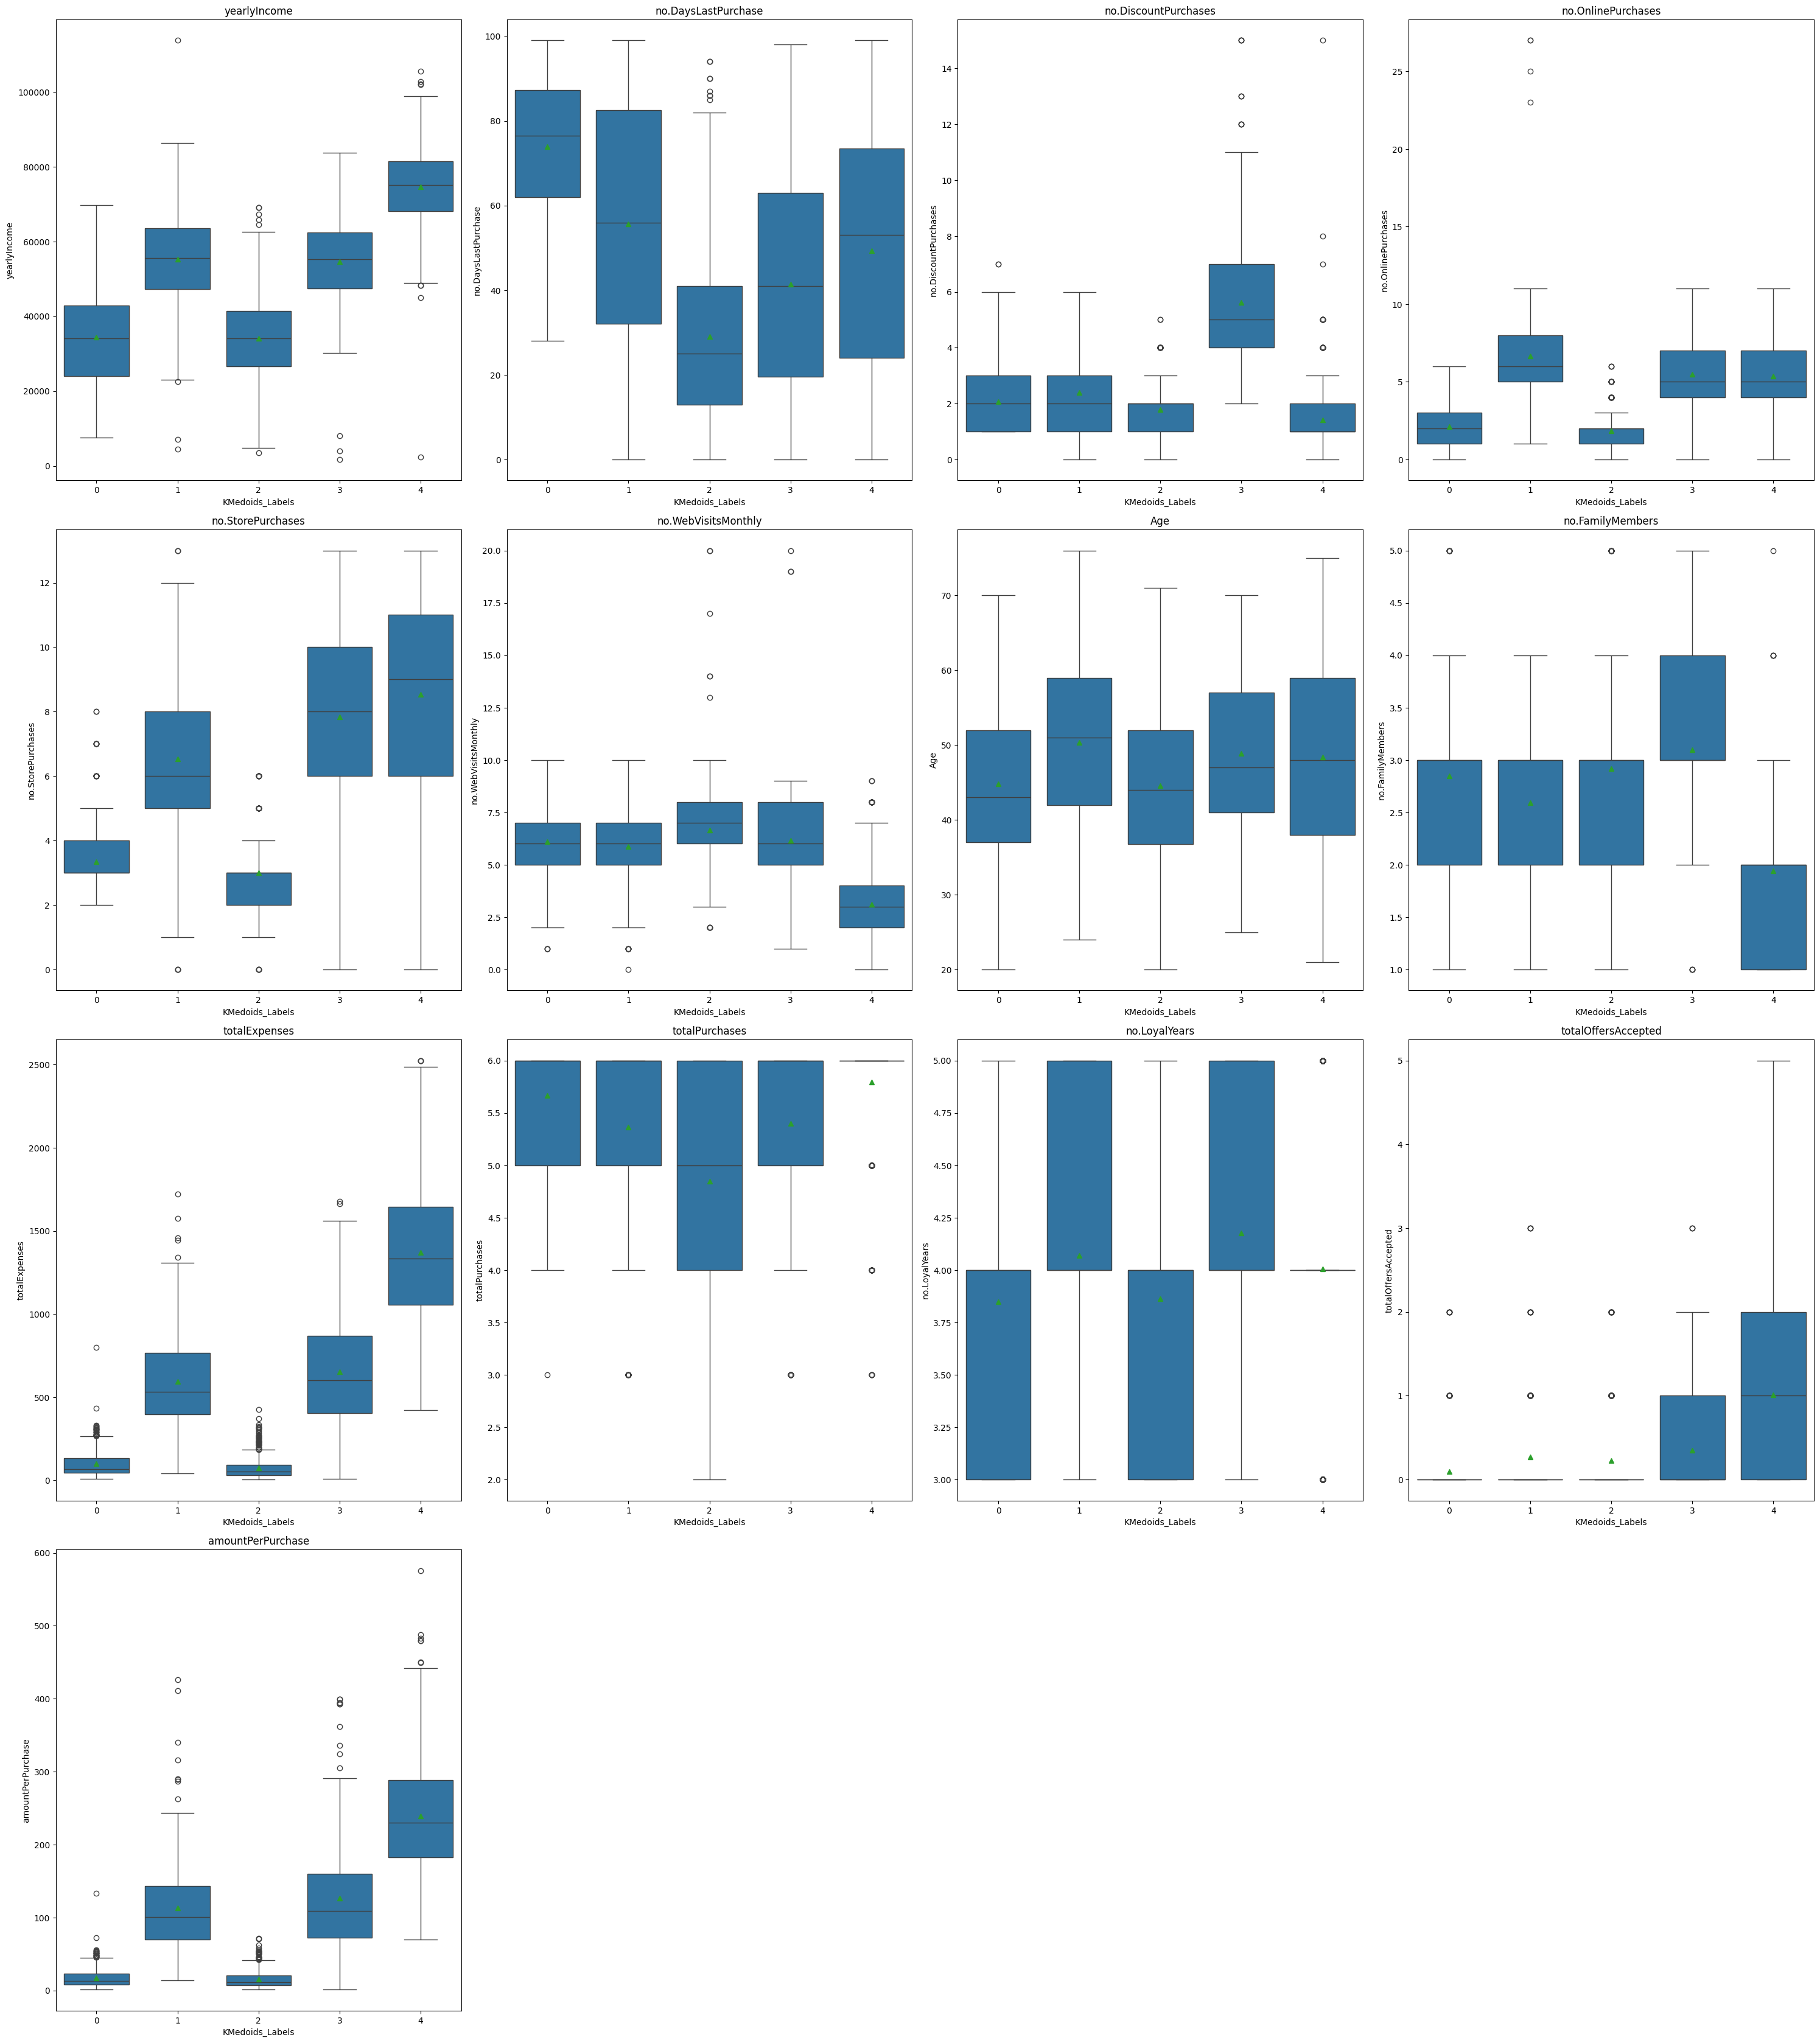

In [906]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=customers_df[variable], x=customers_df['KMedoids_Labels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Segment 0:**

Income: Low income, averaging 35,000.

Purchase Frequency: Longest time since the last purchase (73.84 days).

Discount Purchases: Moderate use of discounts (2.07).

Channel Engagement: Low online purchases (2.11), catalog purchases (0.61), and store purchases (3.34). Moderate web visits (6.09 per month).

Expenses: Low total expenses at 100.54.

Loyalty & Offers: Moderate loyalty (3.85 years), lowest offer acceptance (0.09).

Purchasing Behavior: Average of 5.67 total purchases, with low average spending per purchase ($17.44).

**Summary:**
Segment 0 represents low-income, low-spending customers with minimal online and store engagement. They tend to make infrequent purchases and spend little per transaction, with low loyalty and minimal offer responsiveness. This group may need stronger incentives to increase engagement and spending.


**Segment 1:**

Income: Middle income, averaging 55,000, with some outliers above and below.

Purchase Frequency: Second-longest time since the last purchase (55.59 days).

Discount Purchases: Moderate use of discounts (2.40).

Channel Engagement: High online (6.67), catalog (2.34), and store purchases (6.54). Moderate web visits (5.86).

Expenses: High total expenses at 594.72.

Loyalty & Offers: High loyalty (4.07 years), moderate offer acceptance (0.27).

Purchasing Behavior: Average of 5.37 total purchases, with moderate spending per purchase ($112.79).

**Summary:**

Segment 1 customers are middle-income, moderately engaged across multiple channels, and spend significantly more than Segment 0. With high loyalty and moderate acceptance of offers, they are valuable customers who could benefit from targeted promotions to further increase spending.


**Segment 2:**

Income: Low income, averaging 35,000, with significant high outliers.

Purchase Frequency: Shortest time since the last purchase (28.98 days).

Discount Purchases: Moderate use of discounts (1.78).

Channel Engagement: Low online (1.84), catalog (0.39), and store purchases (2.99). High web visits (6.65 per month).

Expenses: Low total expenses at 75.68.

Loyalty & Offers: Moderate loyalty (3.86 years), moderate offer acceptance (0.23).

Purchasing Behavior: Average of 4.85 total purchases, with low average spending per purchase ($15.19).

**Summary:**

Segment 2 represents low-income customers with frequent but low-value purchases. Despite regular engagement via web visits, their spending remains low. This segment may respond well to tailored, value-based promotions to increase spending.


**Segment 3:**

Income: Middle income, averaging 55,000, with a few outliers.

Purchase Frequency: Moderate time since the last purchase (41.38 days).

Discount Purchases: Highest use of discounts (5.63).

Channel Engagement: High online (5.47), catalog (2.63), and store purchases (7.84). Moderate web visits (6.15).

Expenses: High total expenses at 652.46.

Loyalty & Offers: High loyalty (4.18 years), high offer acceptance (0.35).

Purchasing Behavior: Average of 5.40 total purchases, with high average spending per purchase ($126.23).

**Summary:**

Segment 3 consists of high-spending, middle-income customers who are highly engaged across multiple channels, especially in-store. They are frequent users of discounts, have high loyalty, and accept offers at a higher rate. This segment is highly valuable for retention and further engagement.


**Segment 4:**

Income: High income, averaging 75,000.

Purchase Frequency: Moderate time since the last purchase (49.37 days).

Discount Purchases: Lowest use of discounts (1.41).

Channel Engagement: Very high online (5.38), catalog (6.02), and store purchases (8.53). Low web visits (3.09).

Expenses: Very high total expenses at 1,371.14.

Loyalty & Offers: Moderate loyalty (4.00 years), highest offer acceptance (1.01).

Purchasing Behavior: Average of 5.80 total purchases, with the highest average spending per purchase ($239.38).

**Summary:**

Segment 4 represents high-income customers who spend the most across all channels. They are highly responsive to offers and make large purchases, but rarely use discounts. This premium customer group is ideal for high-end promotions and loyalty programs aimed at maximizing lifetime value.


**Overall Insights:**

**Segment 0:**

Low-income, low-spending customers who need stronger engagement strategies to boost purchases and loyalty.

**Segment 1:**

Middle-income customers with moderate spending and high engagement across all channels. They are valuable, loyal customers who could be further incentivized to increase spending.

**Segment 2:**

Low-income customers who make frequent but low-value purchases. They show high web engagement but need targeted promotions to boost overall spending.

**Segment 3:**

High-spending, middle-income customers who frequently use discounts and are highly engaged across multiple channels. They are loyal and respond well to offers.

**Segment 4:**

The highest-income segment, with the highest spending and the most responsive to offers. They represent the most valuable customers and are ideal for targeted high-end campaigns.

In [907]:
# Dropping labels we got from K-Medoids since we will be using pca_data_df for prediction
pca_data_df.drop('KMedoids_Labels', axis=1, inplace=True)
# Drop KMedoids_Labels from customers_df
customers_df.drop('KMedoids_Labels', axis=1, inplace=True)

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [908]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

# Creating a variable by assigning 0 to it
high_cophenet_corr = 0

# Creating a list by assingning 0's to it
high_dm_lm = [0, 0]

for dm in distance_metrics:
  for lm in linkage_methods:
    Z = linkage(pca_data_df, method = lm, metric = dm)      # Applying different linkages with different distance on pca_data_df
    c, coph_dists = cophenet(Z, pdist(pca_data_df))          # Calculating the cophenetic correlation
    print("Cophenetic correlation for {} distance and {} linkage is {}.".format(
        dm.capitalize(), lm, c
    ))

    if c > high_cophenet_corr:                          # Checking if cophenetic correlation is higher than previous score
      high_cophenet_corr = c                            # Appending to high_cophenet_corr list if it is higher
      high_dm_lm[0] = dm                                # Appending its corresponding distance
      high_dm_lm[1] = lm                                # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.5683266043819107.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6817027998735996.
Cophenetic correlation for Euclidean distance and average linkage is 0.7568032672345048.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5810515159634274.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6056556040066747.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6807135316008819.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.5703339220539396.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4416642508453615.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.651164371840058.
Cophenetic correlation for Cityblock distance and single linkage is 0.5954737782691906.
Cophenetic correlation for Cityblock distance and complete linkage is 0.6489606608617382.
Cophenetic corre

In [909]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("The highest cophenetic correlation is {} for {} distance and {} linkage.".format(
    high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
))

The highest cophenetic correlation is 0.7568032672345048 for Euclidean distance and average linkage.


Dendrograms for different linkages with Cityblock distance

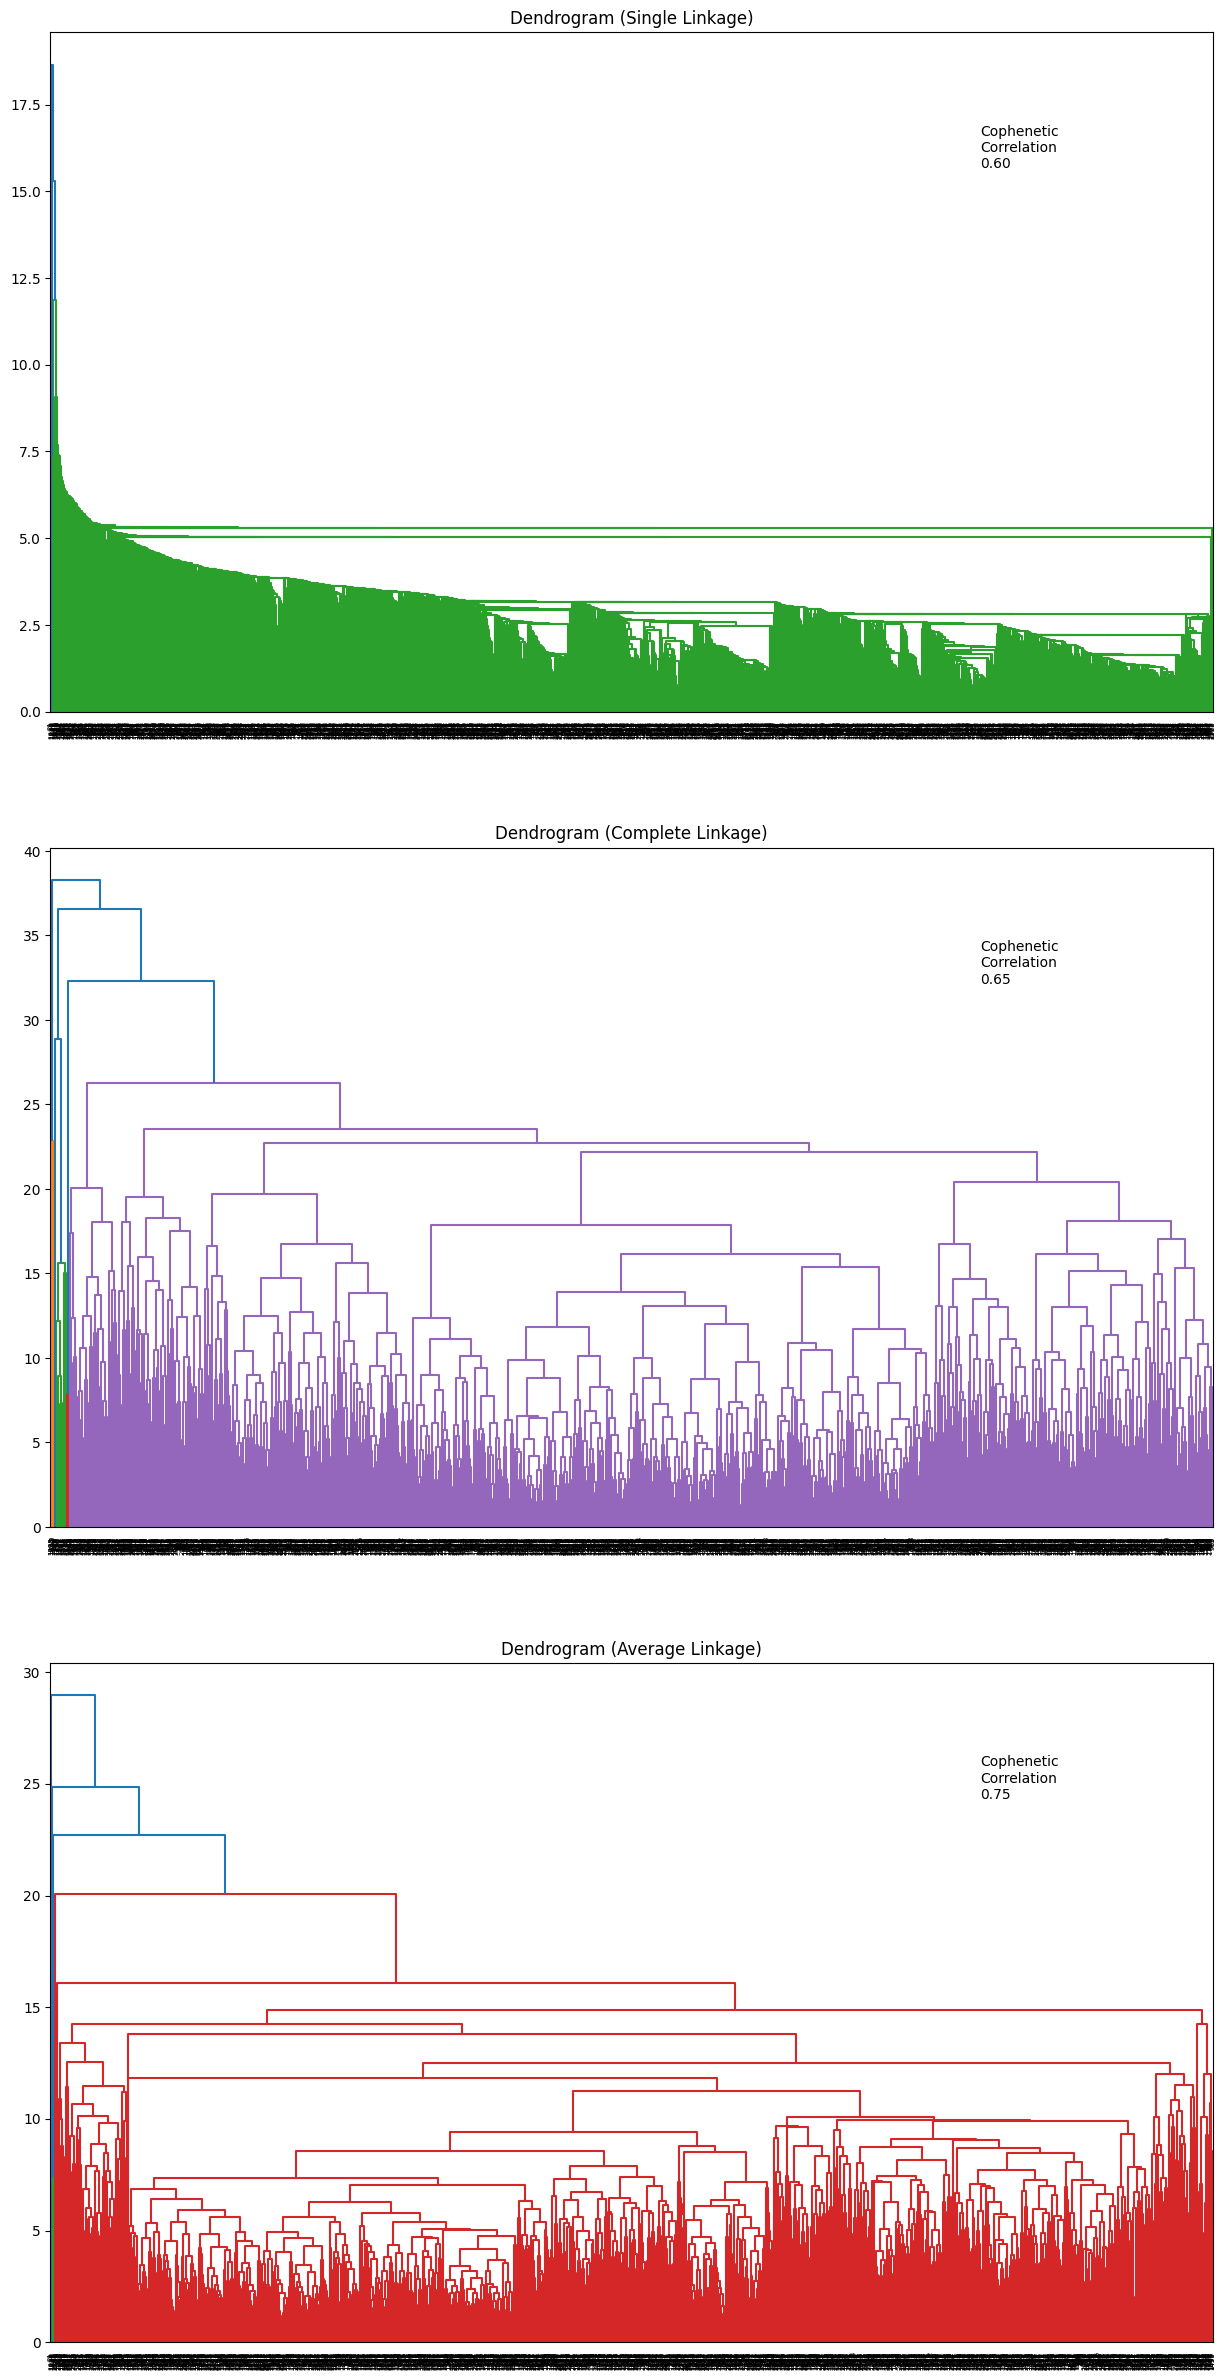

In [910]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(pca_data_df, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(pca_data_df))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

**Dendrograms for different linkages with Chebyshev distance**

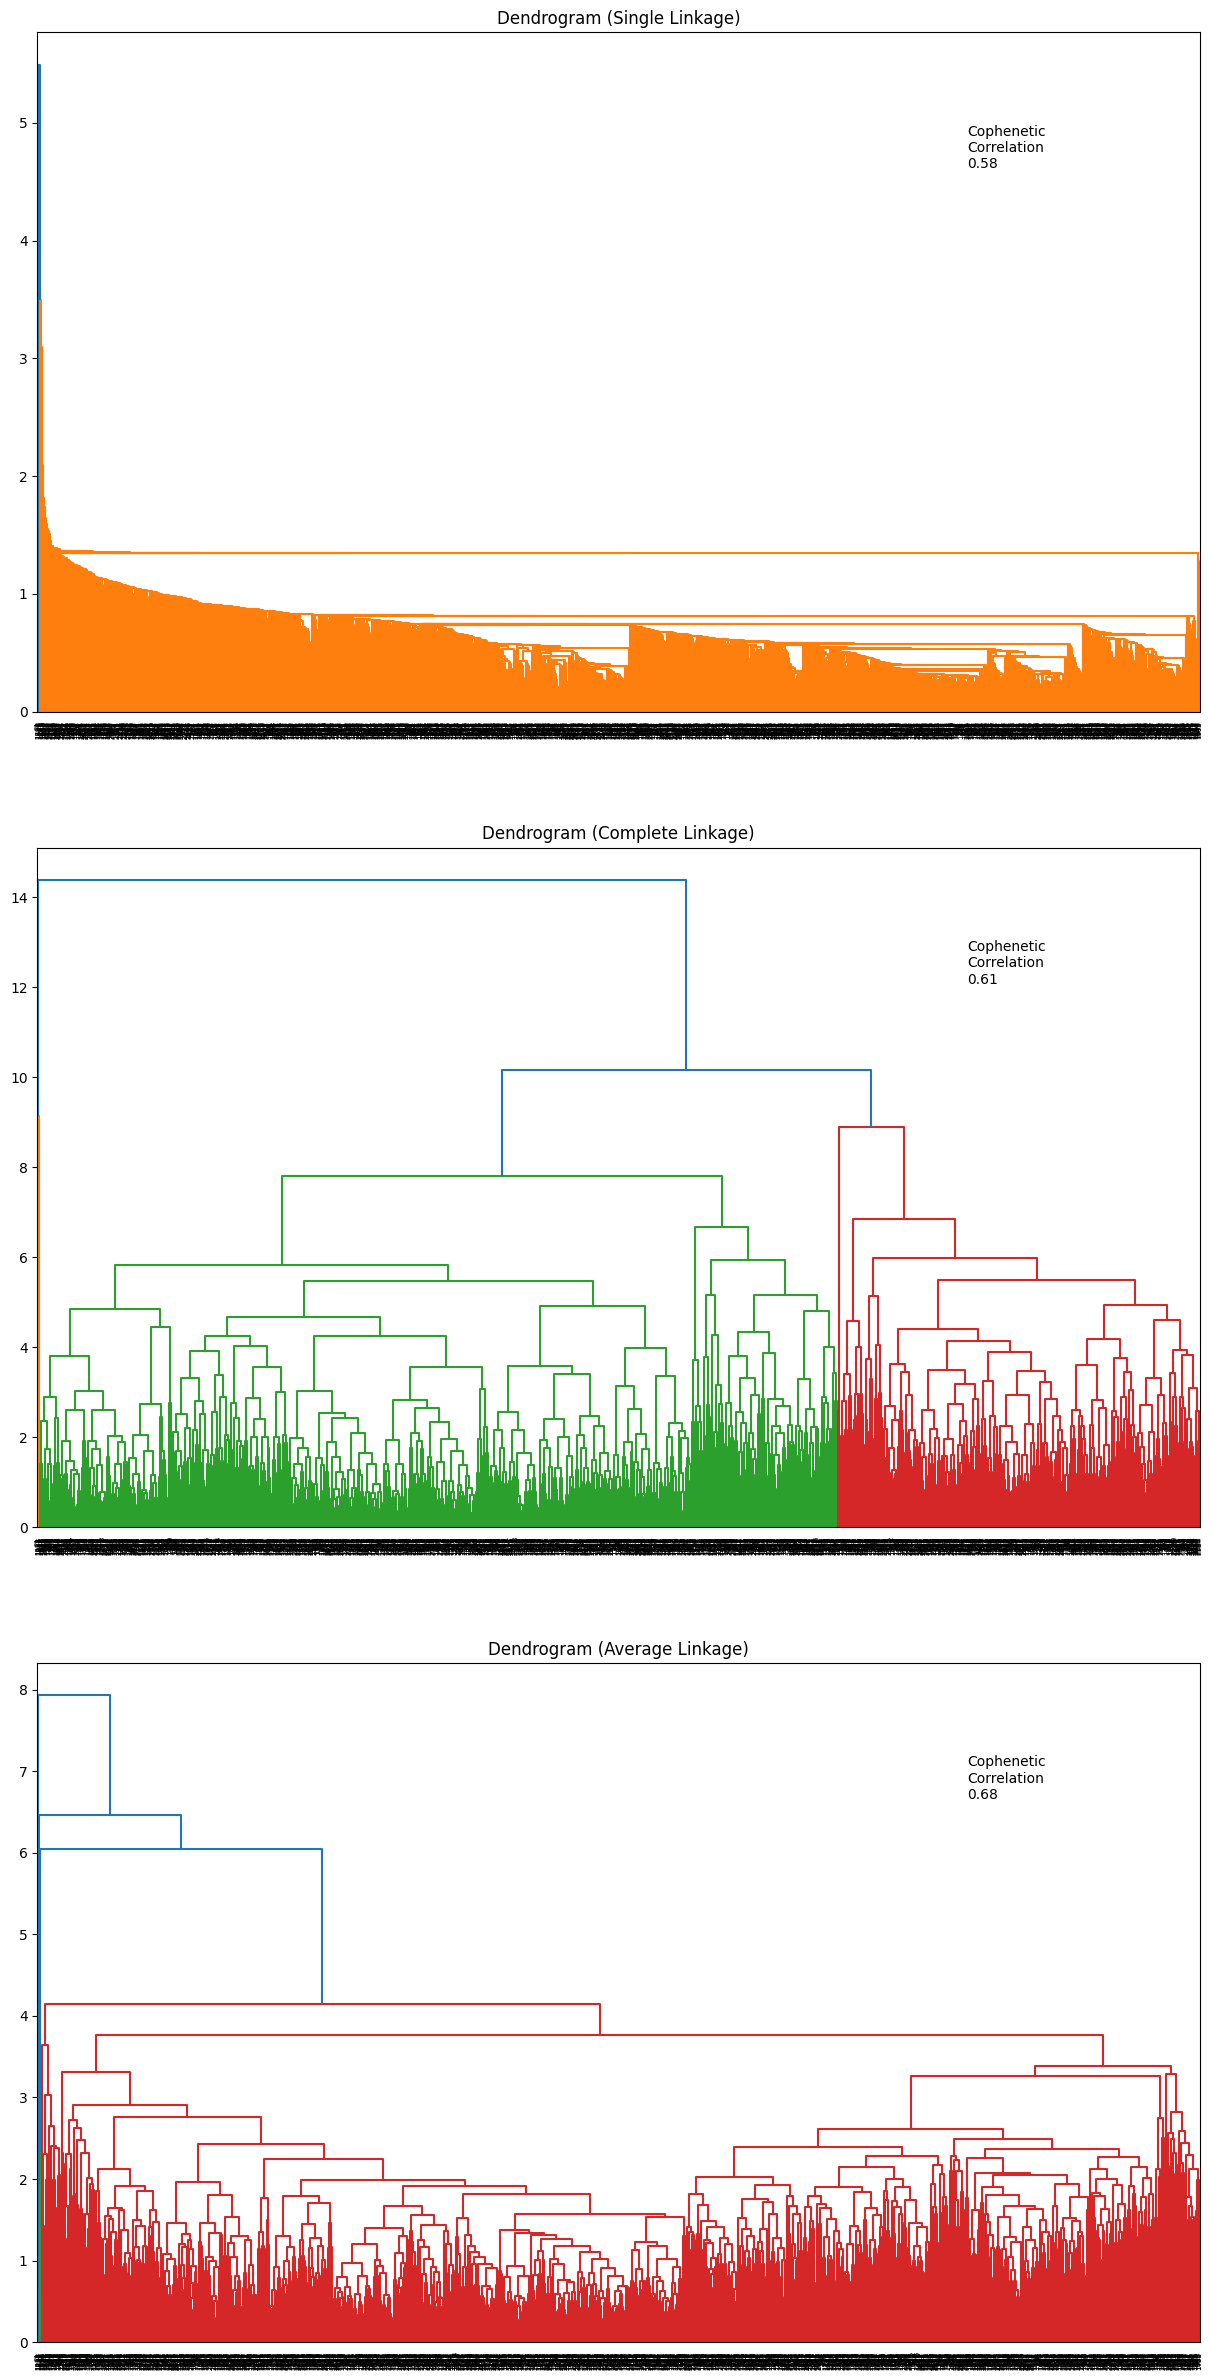

In [911]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(pca_data_df, metric="Chebyshev", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(pca_data_df))                       # Finding cophenetic correlation for different linkages with Cebyshev distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Dendrograms for different linkages with Mahalanobis distance**

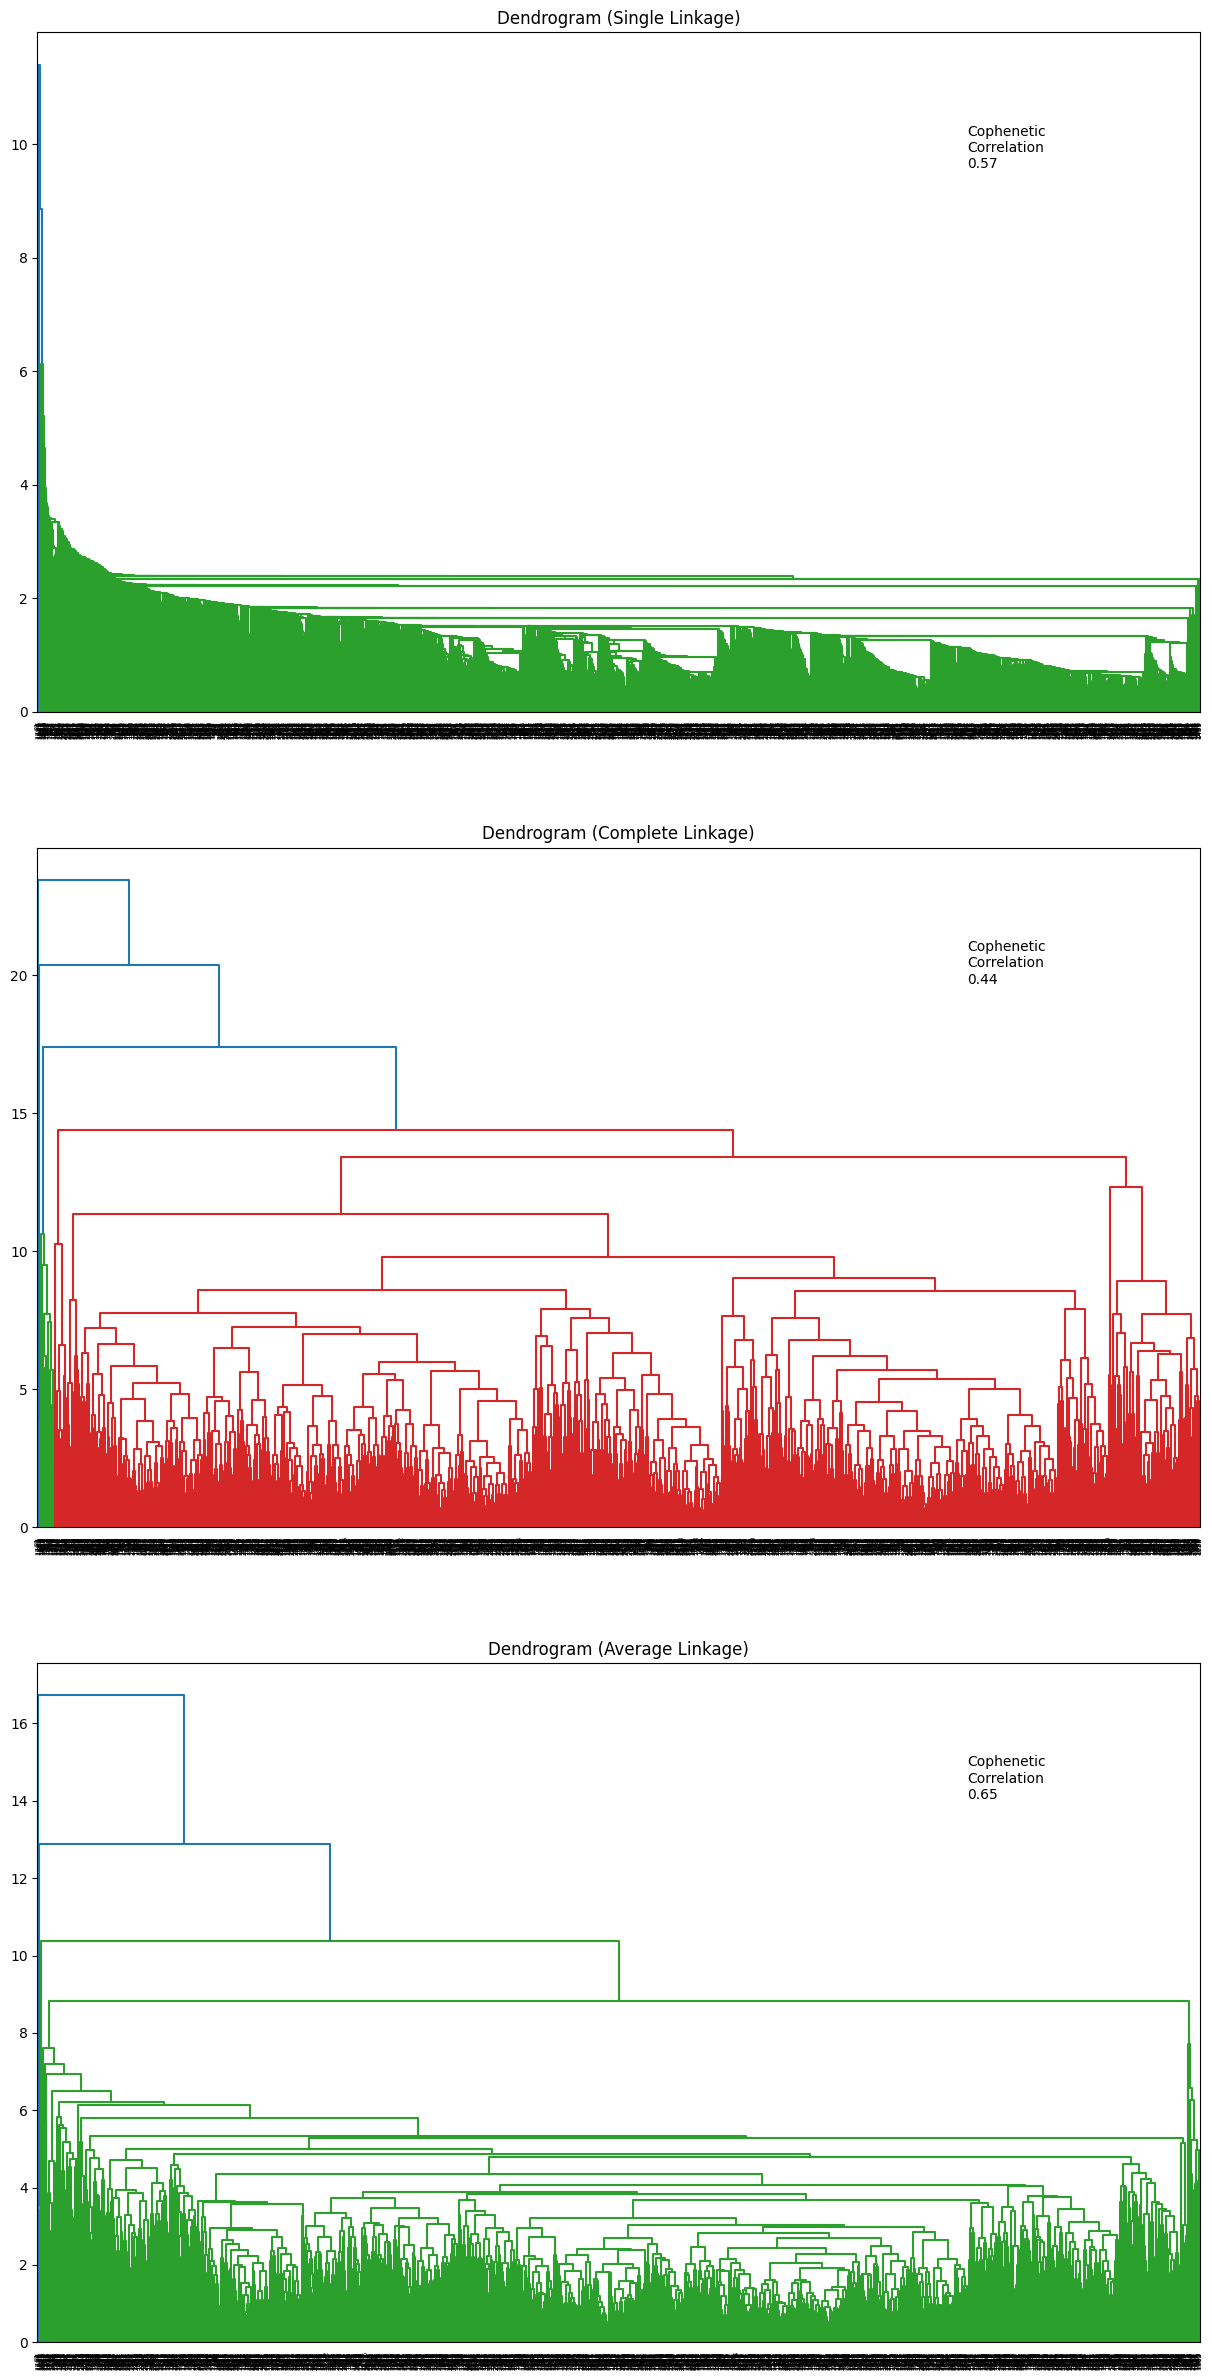

In [912]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(pca_data_df, metric="Mahalanobis", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(pca_data_df))                       # Finding cophenetic correlation for different linkages with Mahalanobis distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Dendrograms for different linkages with Euclidean distance**

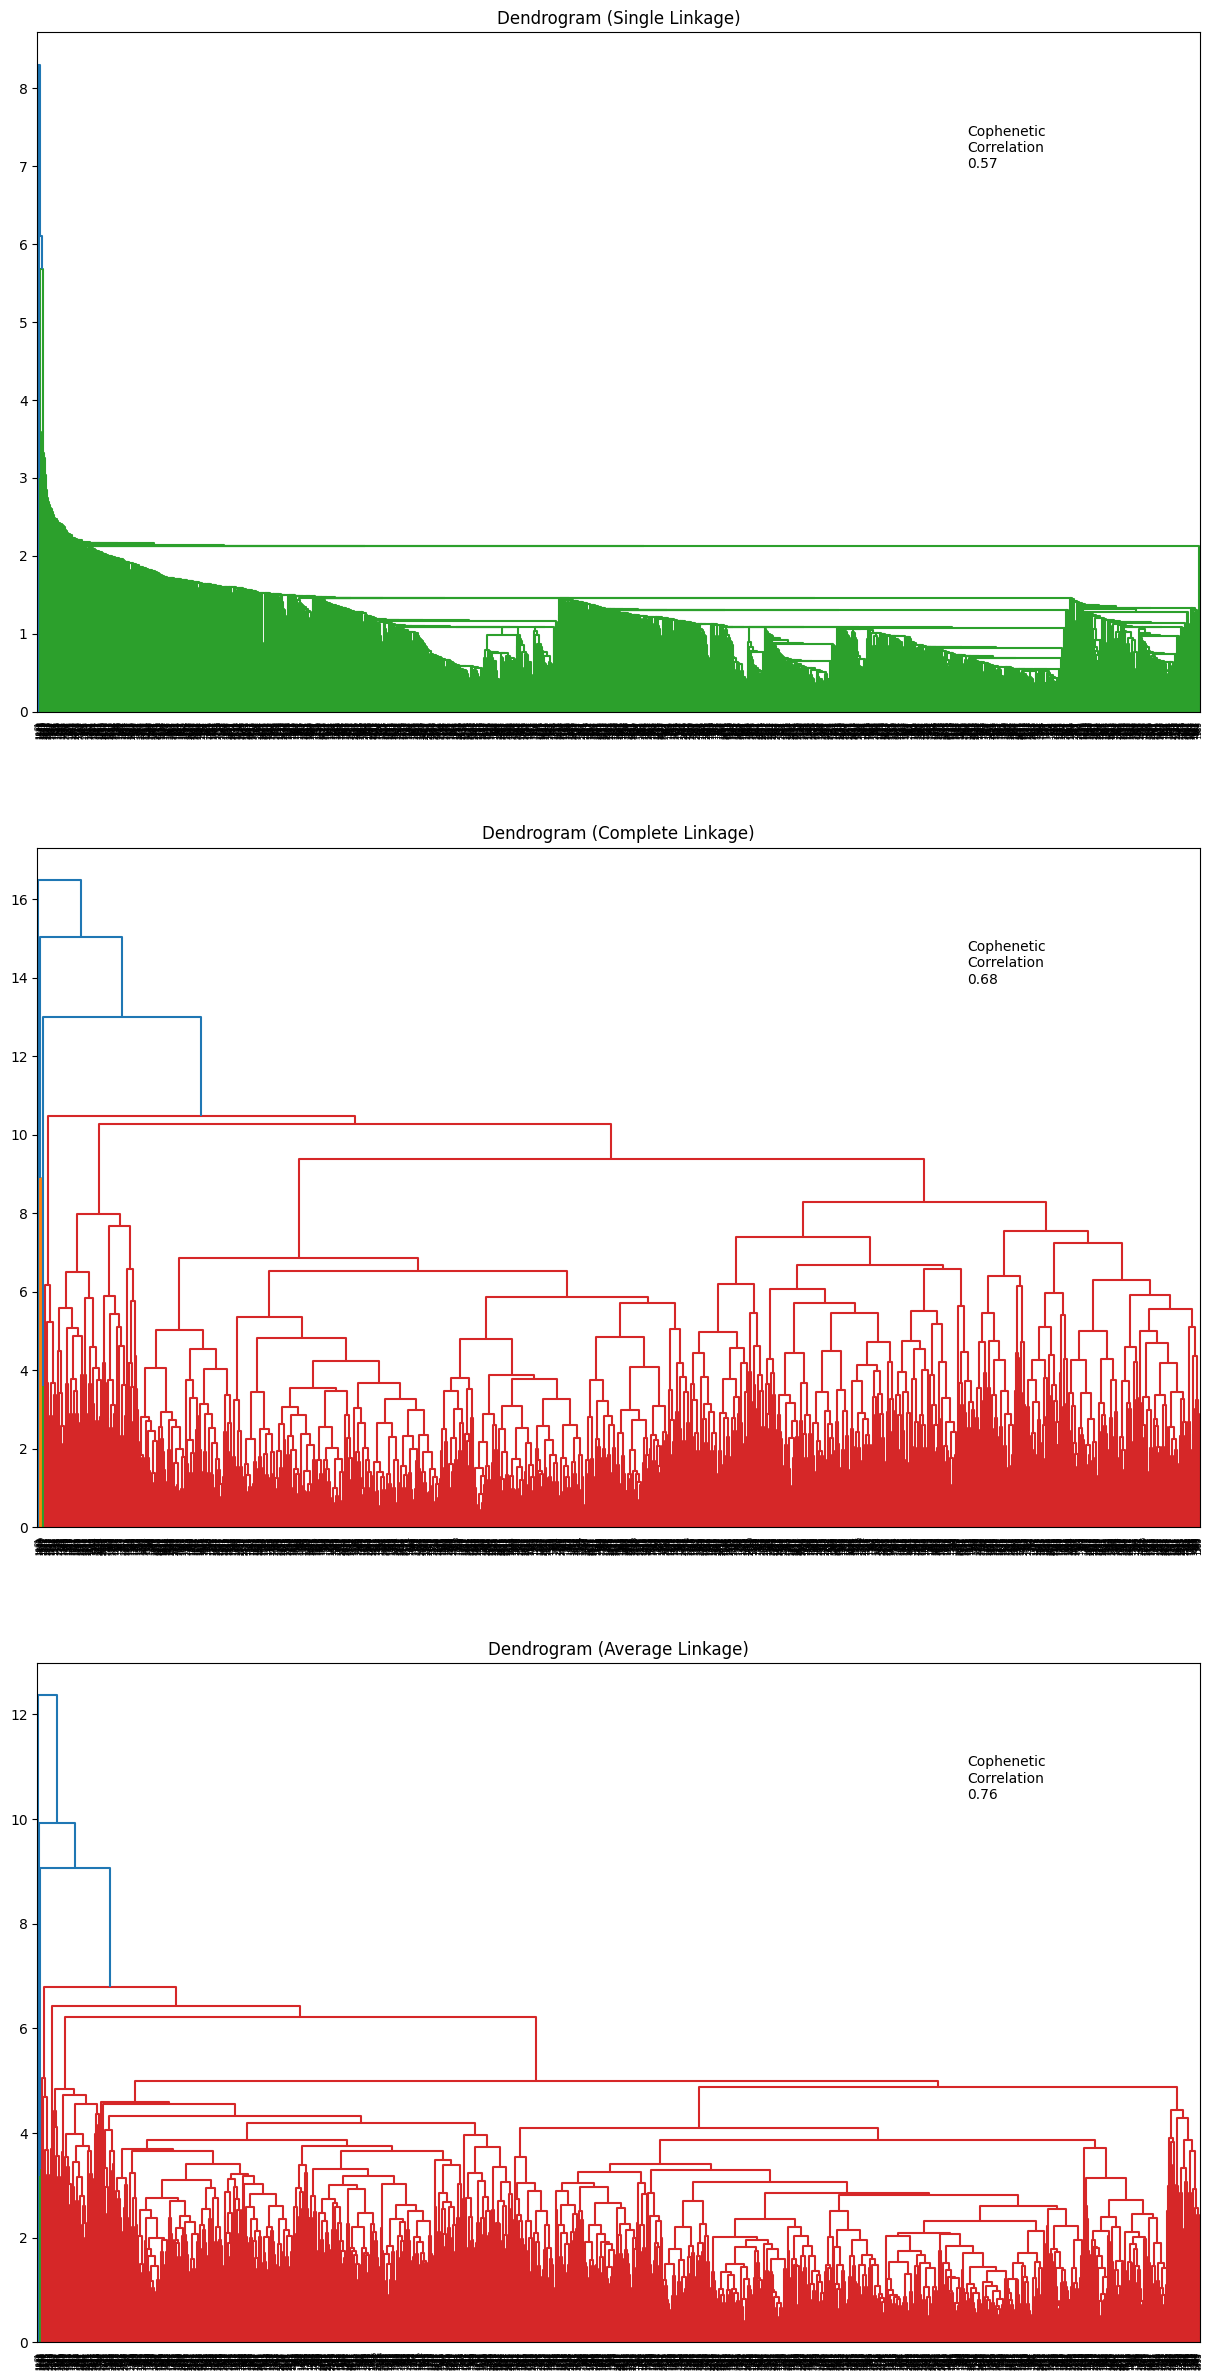

In [913]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(pca_data_df, metric="Euclidean", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(pca_data_df))                       # Finding cophenetic correlation for different linkages with Euclidean distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

- There are no distinct clusters.

In [914]:
# Initialize Agglomerative Clustering with affinity (distance) as 'euclidean', linkage as 'ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward")

# Fit on pca_data_df
HCmodel.fit(pca_data_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=7)

In [915]:
silhouette = silhouette_score(pca_data_df, HCmodel.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.11041321012572339


In [916]:
# Add Agglomerative Clustering cluster labels to pca_data_df
pca_data_df["HC_Labels"] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to the customers_df
customers_df["HC_Labels"] = HCmodel.labels_

# Add Agglomerative Clustering cluster labels to behavirol_data
behavioral_data["HC_Labels"] = HCmodel.labels_


In [917]:
# Check the distribution
customers_df['HC_Labels'].value_counts()

HC_Labels
2    623
0    520
1    462
6    319
3    154
5     91
4     60
Name: count, dtype: int64

### **Visualize the clusters using PCA**

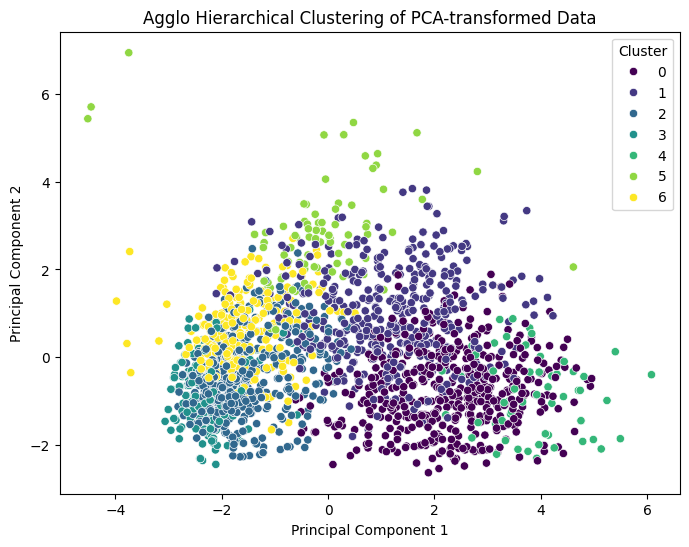

In [918]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

sns.scatterplot(x = 0, y = 1, data=pca_data_df, hue = "HC_Labels", palette = 'viridis')

plt.title('Agglo Hierarchical Clustering of PCA-transformed Data')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')

plt.show()

### **Cluster Profiling**

In [919]:
# Take the cluster-wise mean of all the variables. Hint: First group 'behavioral_data' by cluster labels column and then find mean
cluster_profile_HC_3 = behavioral_data.groupby('HC_Labels').mean()

# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_HC_3.style.highlight_max(color="darkgreen", axis=0)

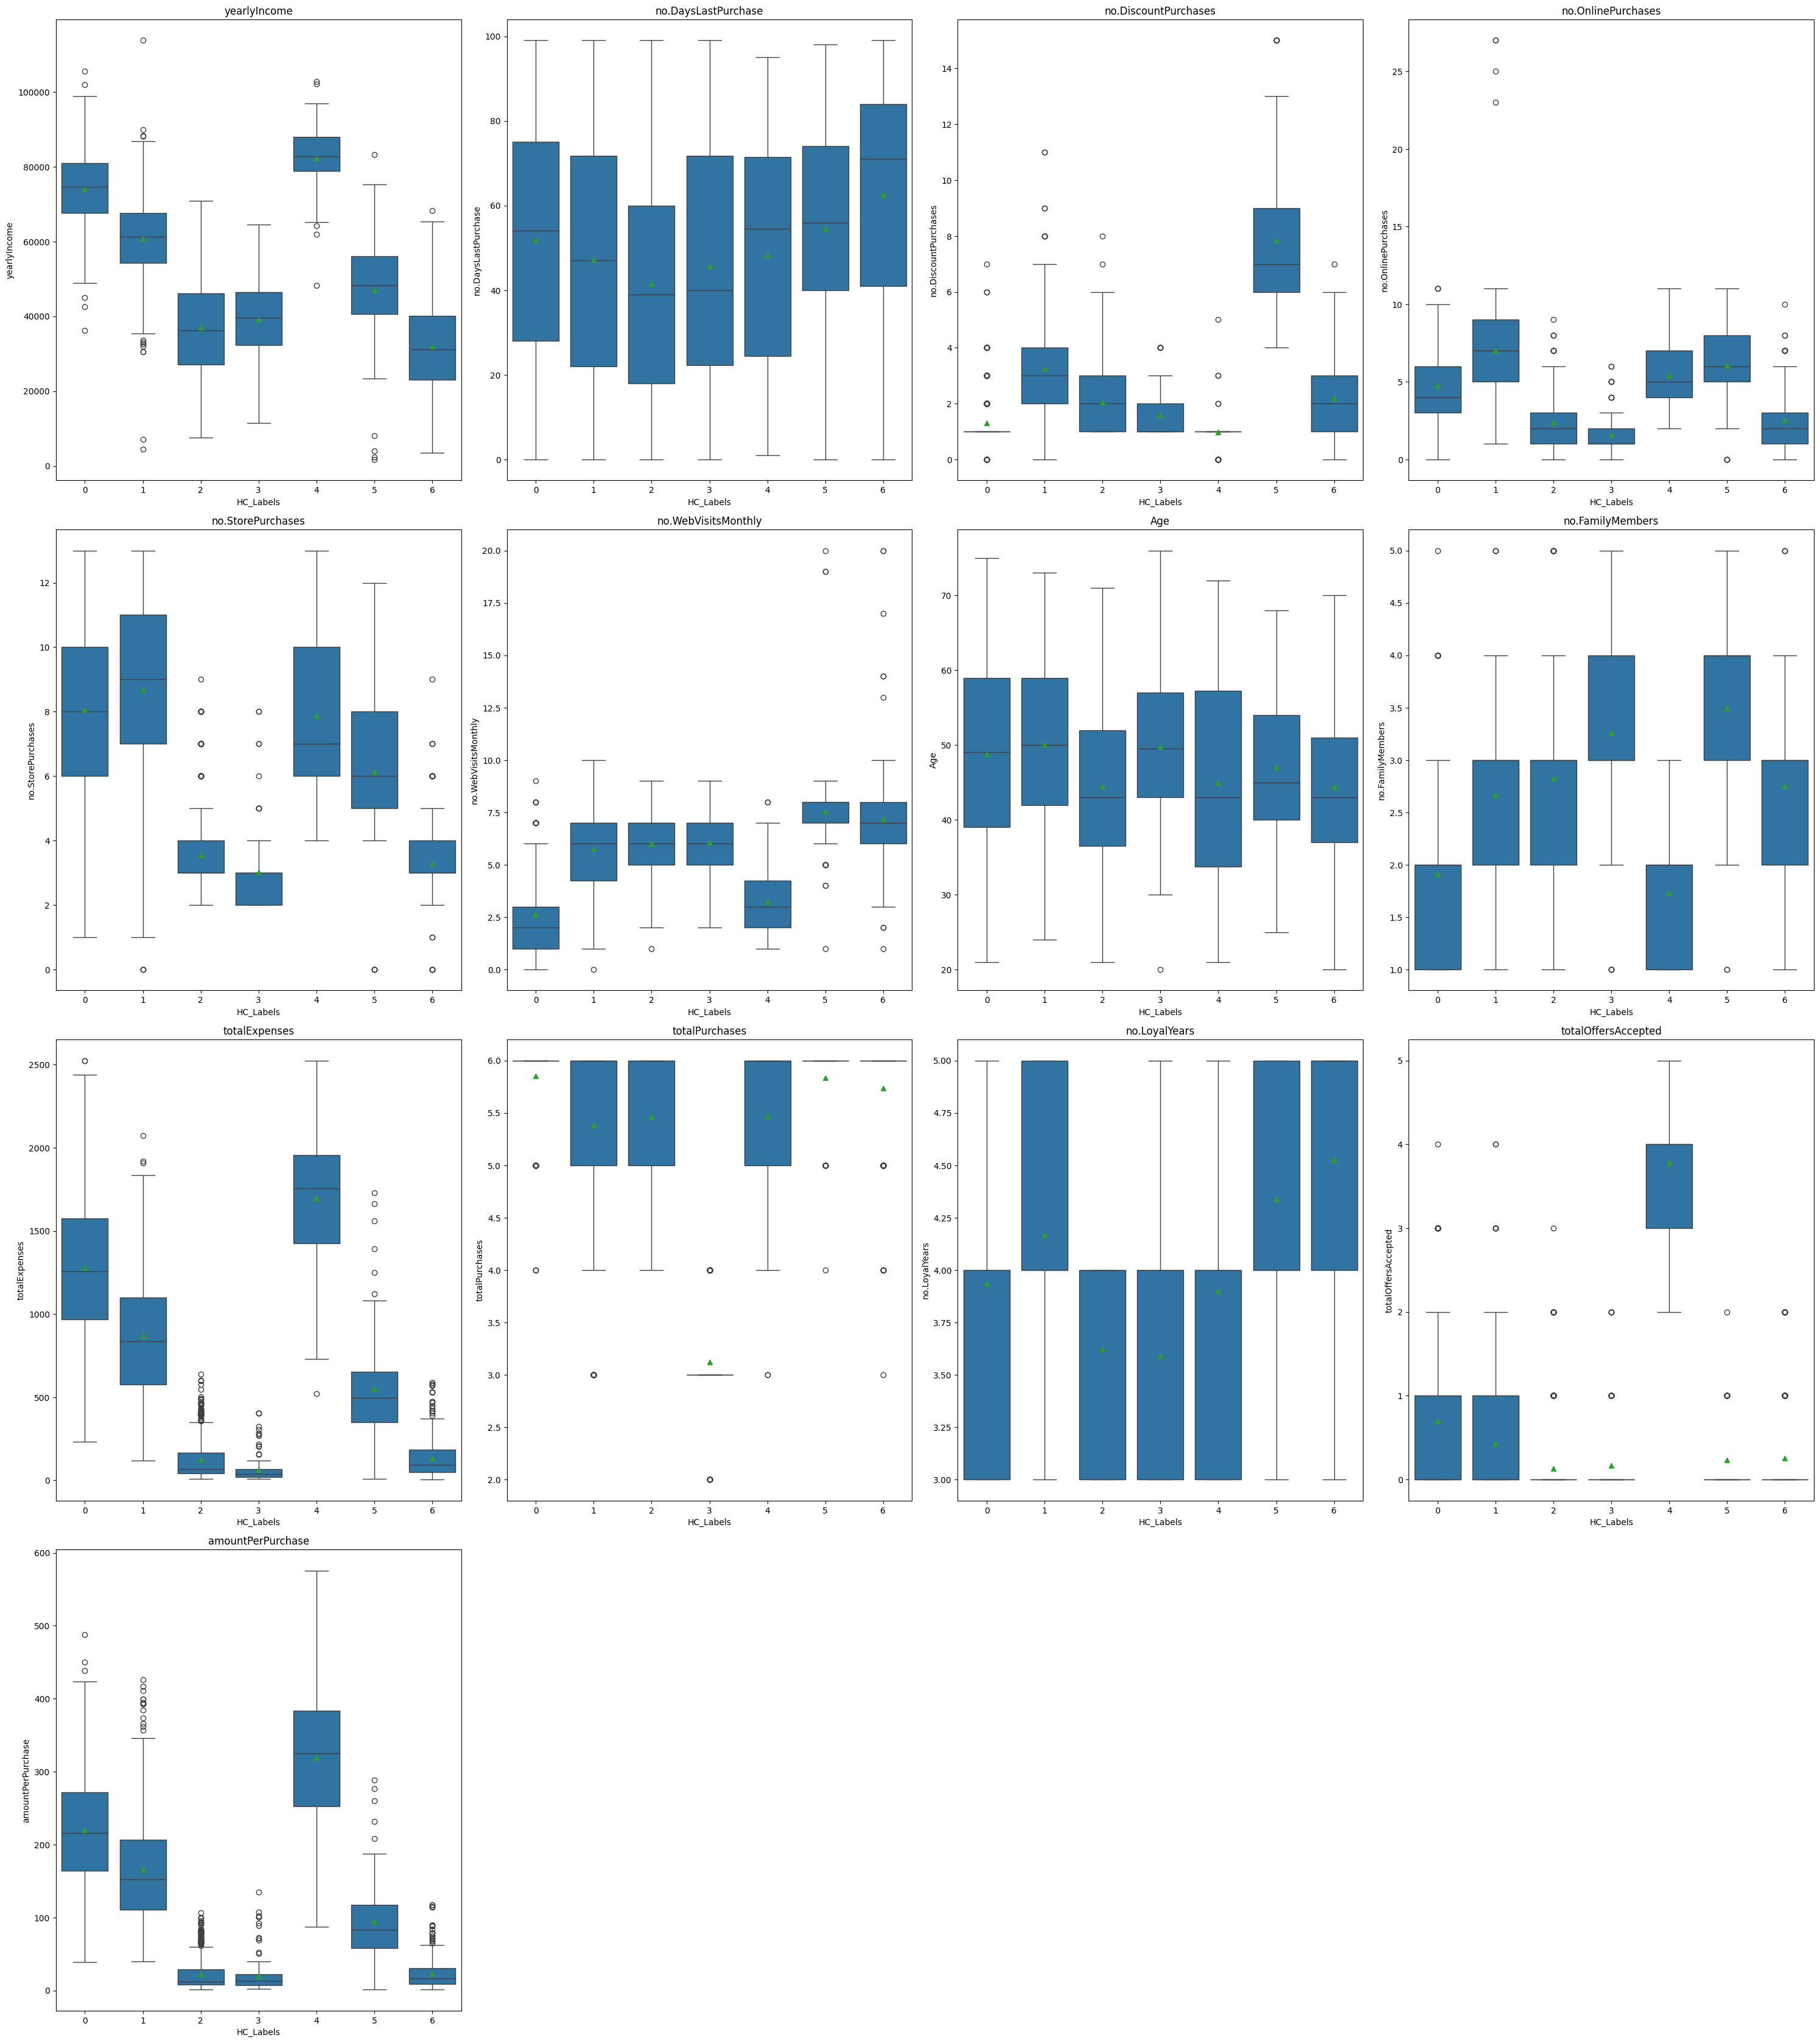

In [920]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)

    sns.boxplot(y=customers_df[variable], x=customers_df['HC_Labels'],showmeans=True)

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations and Insights:**

### **Characteristics of each cluster**

**Observations and Insights for Agglomerative Hierarchical Clustering (AHC):**

**Segment 0:**

Income: Low-income group, with an average income of 35,000.

Purchase Frequency: Customers make purchases around every 48.22 days.

Discount Purchases: Moderate use of discounts, with an average of 2.03 purchases.

Channel Engagement:
Low online purchases (2.32) and catalog purchases (0.65).

Moderate store purchases (3.40).

Moderate web visits (6.37 per month).

Expenses: Low total expenses at 118.63.

Loyalty & Offers: Moderate loyalty at 3.88 years and low offer acceptance (0.17).

Purchasing Behavior: Average of 5.21 total purchases, with low spending per purchase (22.36).

**Insights:**

Customer Profile:

Segment 0 represents low-income, low-spending customers who engage moderately across different channels but spend minimally per purchase. They show moderate loyalty but are not highly responsive to offers, making them a segment that could benefit from increased promotional efforts.

Actionable Strategy:

This segment may respond to discount-focused campaigns to encourage increased purchasing, especially through online channels where engagement is low.

**Segment 1:**

Income: High-income group, with an average income of 75,000.

Purchase Frequency: Customers make purchases every 51.48 days on average.

Discount Purchases: Low use of discounts (1.27).

Channel Engagement:
High online purchases (4.83), catalog purchases (5.76), and store purchases (8.04).
Low web visits (2.70 per month).

Expenses: Very high total expenses at 1,323.33.

Loyalty & Offers: Moderate loyalty at 3.93 years, and high offer acceptance (1.02).

Purchasing Behavior: Customers make an average of 5.81 total purchases, with a very high spending per purchase (230.20).

Insights:
Customer Profile:

Segment 1 represents high-income, high-spending customers with a strong preference for online, catalog, and store purchases. Despite making fewer web visits, they spend the most per purchase and are highly responsive to offers.

Actionable Strategy:

This segment should be targeted with premium offers and loyalty programs to retain their high value. Personalized catalog promotions and targeted email campaigns could boost their engagement further, given their high spending and strong response to offers.

**Segment 2:**

Income: Middle-income group, with an average income of 60,000.

Purchase Frequency: Customers make purchases every 48.37 days.

Discount Purchases: Highest use of discounts (3.99).

Channel Engagement:

Very high online purchases (6.85), catalog purchases (3.30), and store purchases (8.26). Moderate web visits (6.05 per month). Expenses: High total expenses at 817.72.

Loyalty & Offers: High loyalty (4.20 years) and moderate offer acceptance (0.40).

Purchasing Behavior: Customers make an average of 5.46 total purchases, with high spending per purchase (153.96).

**Insights:**

Customer Profile:

Segment 2 represents middle-income, discount-driven customers who are highly engaged across all channels, especially online. They have a high number of purchases, often using discounts, and demonstrate loyalty.

Actionable Strategy:

This group is cost-conscious but remains valuable due to their high total spending. They can be targeted with discount offers and personalized promotions to further increase engagement, especially through online and store channels where they are highly active.

**Overall Insights:**

**Segment 0:**

Represents low-income customers who are moderately engaged but have low spending power. They could benefit from incentives like discounts or loyalty programs to encourage higher spending.

**Segment 1:**

High-income, high-spending customers who are less frequent but extremely valuable. They are prime targets for premium promotions and high-end loyalty rewards. Their high acceptance of offers suggests they are highly responsive to well-targeted campaigns.

**Segment 2:**

Middle-income, highly engaged customers who respond well to discounts and spend significantly across all channels. This segment could be incentivized to remain loyal with personalized offers and discount-based promotions that tap into their high engagement.

Which Segment is Most Valuable?

Segment 1 is the most valuable based on high income, high spending, and strong responsiveness to offers, making them ideal for high-value, personalized marketing strategies.

Segment 2 also represents a highly valuable segment with strong engagement and high spending, but they are more discount-sensitive, making them ideal for cost-conscious promotions.

Segment 0 requires further engagement to boost their spending and responsiveness to offers. Discount campaigns and re-engagement strategies could help increase their value.

In [921]:
pca_data_df.drop('HC_Labels', axis=1, inplace=True)

customers_df.drop('HC_Labels', axis=1, inplace=True)

behavioral_data.drop(['HC_Labels', 'K_means_segments_3',	'K_means_segments_5',	'KMedoids_Labels'], axis=1, inplace=True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [922]:
# Initializing lists
eps_values = [3, 6]                     # Taking random eps values
min_sample_values = [3, 10]              # Taking random min_sample values

# Creating a dictionary for each of the values in eps_values with min_sample_values
res = {eps: min_sample_values for eps in eps_values}

# Finding the silhouette_score for each of the combinations
high_silhouette_avg = -1                  # Initialize to -1 to handle negative scores
high_i_j = [0, 0]                         # Assigning 0's to the high_i_j list

for eps in res.keys():
    for min_samples in res[eps]:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_data_df)  # Apply DBSCAN
        labels = db.labels_

        # Check if there are at least 2 unique labels to compute silhouette score
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(pca_data_df, labels)  # Calculate silhouette score
            print(
                f"For eps value = {eps}, "
                f"For min_samples = {min_samples}, "
                f"The average silhouette_score is: {silhouette_avg}"
            )
            if silhouette_avg > high_silhouette_avg:  # Update if new high score
                high_silhouette_avg = silhouette_avg
                high_i_j = [eps, min_samples]

print(f"Best eps value: {high_i_j[0]}, Best min_samples: {high_i_j[1]}, Highest silhouette score: {high_silhouette_avg}")

For eps value = 3, For min_samples = 3, The average silhouette_score is: 0.46132671918543744
For eps value = 3, For min_samples = 10, The average silhouette_score is: 0.49946130912362713
For eps value = 6, For min_samples = 3, The average silhouette_score is: 0.5483239612277251
For eps value = 6, For min_samples = 10, The average silhouette_score is: 0.5597086525015814
Best eps value: 6, Best min_samples: 10, Highest silhouette score: 0.5597086525015814


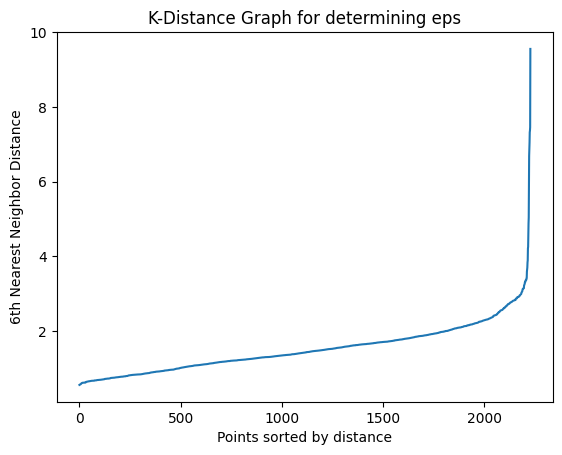

In [923]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit the NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=10)  # You can set 6 as min_samples or other values
neighbors_fit = neighbors.fit(pca_data_df)  # 'data' is your dataset
distances, indices = neighbors_fit.kneighbors(pca_data_df)

# Sort the distances (index 4 because we want the 5th neighbor distance for k=5)
distances = np.sort(distances[:, 9], axis=0)

# Plot the sorted distances
plt.plot(distances)
plt.ylabel('6th Nearest Neighbor Distance')
plt.xlabel('Points sorted by distance')
plt.title('K-Distance Graph for determining eps')
plt.show()


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [924]:
# Apply DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps=6, min_samples=10).fit(pca_data_df)

In [925]:
# fit_predict on data_pca and add DBSCAN cluster labels to customers_df
customers_df['DBSCAN_Labels'] = dbs.labels_

# fit_predict on data_pca and add DBSCAN cluster labels to behavioral_data
behavioral_data['DBSCAN_Labels'] = dbs.labels_

# fit_predict on data_pca and add DBSCAN cluster labels to pca_data_df
pca_data_df['DBSCAN_Labels'] = dbs.labels_

In [926]:
# Check distribution
pca_data_df['DBSCAN_Labels'].value_counts()

DBSCAN_Labels
 0    2222
-1       7
Name: count, dtype: int64

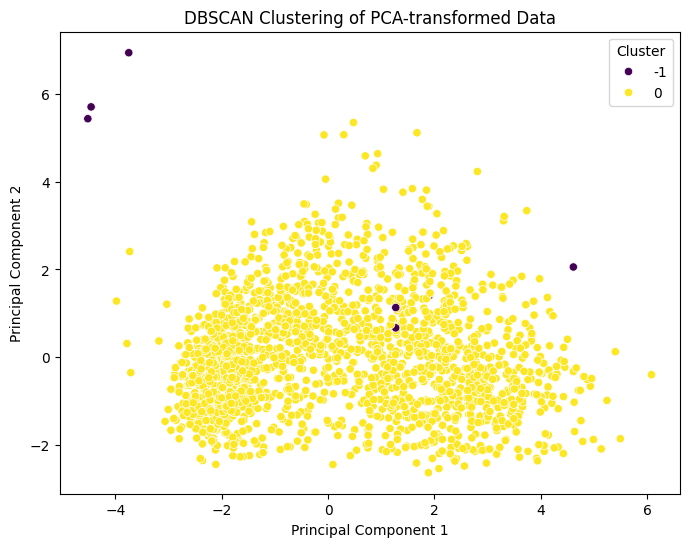

In [927]:
# Visualize the clusters using pca_data_df
plt.figure(figsize=(8, 6))

sns.scatterplot(x = 0, y = 1, data=pca_data_df, hue = "DBSCAN_Labels", palette = 'viridis')

plt.title('DBSCAN Clustering of PCA-transformed Data')

plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')

plt.show()

In [928]:
from sklearn.metrics import silhouette_score

# Silhouette score (1 is perfect, -1 is poor clustering)
score = silhouette_score(pca_data_df, dbs.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.5619441706617095


In [929]:
noise_points = len(dbs.labels_[dbs.labels_ == -1])
print(f"Number of noise points: {noise_points}")


Number of noise points: 7


In [930]:
pca_data_df.drop('DBSCAN_Labels', axis=1, inplace=True)

**Observations and Insights:**

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

### **Characteristics of each cluster**

**Summary of each cluster:**

Dominant Cluster (Cluster 0):

2221 points are in a single large cluster (Cluster 0), which again indicates that most of your data is grouped together.

Small Clusters (Cluster 1 & 2):

Cluster 1 has 4 points, and Cluster 2 has 3 points, both of which are very small.
These small clusters suggest that a few points are considered distinct, but they might not represent meaningful clusters due to their size.
Noise Points (-1):

Only 1 point is classified as noise. The noise level is extremely low, so DBSCAN is treating nearly all points as part of a cluster.
Silhouette Score:

The silhouette score of 0.507 suggests that the clusters are moderately well-separated. A score above 0.5 generally indicates that the clusters are reasonably distinct, but the presence of such small clusters (Cluster 1 & 2) suggests that the score may be inflated due to the large size of Cluster 0.

**Insights:**

Unbalanced Clustering: The large difference in the number of points in Cluster 0 compared to Clusters 1 and 2 indicates unbalanced clusters. Cluster 0 dominates the segmentation, while Clusters 1 and 2 are very small and may not offer much useful insight.
Small Clusters: With only 3 and 4 points in Clusters 1 and 2, these are likely outliers or points that don't fit neatly into the main cluster. These tiny clusters may not be meaningful for deeper analysis.
Low Noise: Having only 1 noise point means that the eps and min_samples combination is treating nearly all points as part of some cluster, even those that might be outliers.

## **Gaussian Mixture Model**

In [931]:
# Initialize Gaussian Mixture Model with number of clusters as 5 and random_state=1
gmm = GaussianMixture(n_components=3, random_state=1)

# Fit the model and predict the clusters using the PCA-transformed data
preds = gmm.fit_predict(pca_data_df)

# Calculate the silhouette score
score = silhouette_score(pca_data_df, preds)

# Print the silhouette score
print(score)

0.06517693374158307


**Observations and Insights:**

- Silhouette Score for 3 clusters: 0.06517693374158307

- Silhouette Score for 5 clusters: 0.013395483284602137

- With such low scores, cluster separation was very poor.

## **Conclusion and Recommendations**

**1. Comparison of Various Techniques and Their Relative Performance Based on Chosen Metric (Measure of Success):**
Techniques Used:

**K-Means (5 Clusters):**

Silhouette Score: 0.197.
Performance: K-Means provided balanced clusters with useful insights and customer segmentation. The silhouette score is moderate, but the clusters are more actionable than the other methods.

**Agglomerative Hierarchical Clustering (AHC):**

- 3 Clusters, Euclidean + Average Linkage: Silhouette score 0.548, but with highly imbalanced clusters (one large cluster, very few small ones).

- 5 Clusters, Euclidean + Complete Linkage: Silhouette score 0.28, again showing poor cluster separation and imbalance.

- Performance: AHC gave a high silhouette score with 3 clusters, but the imbalance in cluster sizes limited its utility for meaningful segmentation. The 5-cluster solution produced poor separation, and increasing clusters didn’t lead to improvements.

**K-Medoids (5 Clusters):**

- Silhouette Score: 0.118.

- Performance: K-Medoids had the lowest silhouette score and failed to deliver distinct or balanced clusters. The clusters were too small to generate valuable insights.

**Which One is Performing Relatively Better?**

- K-Means outperformed the others when considering balanced clusters and actionable segmentation despite having a lower silhouette score than AHC (0.197 vs. 0.548). The trade-off between silhouette score and actionable insights favors K-Means for this data.

**Is There Scope to Improve the Performance Further?**

**Potential Improvements:**

Tuning the Number of Clusters: Slight adjustments (e.g., using 4 or 6 clusters) could further improve segmentation in K-Means.
Feature Engineering: Refining the features used for clustering, such as adding or transforming variables, could improve cluster quality.

**2. Refined Insights:**

**Most Meaningful Insights:**

**High-Spending Customers (Segment 4):**

- Represent high-income individuals with high total expenses and high responsiveness to offers. These customers engage heavily across multiple channels but rarely use discounts. They are prime candidates for premium marketing and high-end loyalty programs.

**Discount-Driven Shoppers (Segment 3):**

- These middle-income customers spend significantly but are driven by discounts. They are highly loyal and engage well across channels. Retention strategies with discount offers would work well here.

**Low-Engagement, Low-Spending Customers (Segments 0 and 2):**

- These segments consist of low-income customers who spend little and make infrequent purchases. Segment 2 engages more with online channels but still spends less per transaction. Budget-friendly offers or entry-level loyalty programs could help increase their value.

**Overall Business Value:**

- Premium Segment (Segment 4): Focus on personalized, high-value offers for retention.

- Discount Segment (Segment 3): Nurture with discount-driven loyalty programs.

- Low-Spending Segments (0 and 2): Use promotional campaigns to increase engagement and spending.

**3. Proposal for the Final Solution Design:**
Proposed Model: K-Means (5 Clusters).

**Why K-Means is the Best Solution:**

- Balanced and Actionable Segmentation: While the silhouette score is lower than AHC, K-Means produces more balanced clusters with clear and actionable customer segments.

- Practical and Scalable: K-Means is computationally efficient and scalable for larger datasets, which is important if the data grows.

- Effective Segmentation: The clusters identified by K-Means allow for differentiated marketing strategies that align with customer behaviors (high spenders, discount-driven customers, low spenders).

- Actionable Business Insights: The insights from K-Means allow the business to target different customer segments with tailored campaigns, which is crucial for improving customer retention and increasing spending.

**Final Solution Design:**

1. K-Means (5 Clusters) as the clustering algorithm.

2. Segmentation Strategy:

- Segment 4 (High-Income, Premium Customers): Target with premium offers, exclusive memberships, and VIP programs.

- Segment 3 (Middle-Income, Discount-Driven Shoppers): Focus on discount-based retention strategies.

- Segments 0 and 2 (Low-Income, Low-Spenders): Use promotions and entry-level loyalty programs to boost engagement and spending.

3. Marketing Campaigns:

- Personalized offers for high spenders.

- Loyalty programs for loyal discount shoppers.

- Promotional campaigns to incentivize lower-spending customers to spend more.

In conclusion, K-Means offers the best balance of performance, cluster quality, and actionable insights, making it the optimal choice for customer segmentation in this case.